# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    location = [city, lat_lng[0], lat_lng[1]]
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(location)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#print(cities)


Number of cities in the list: 1500


In [4]:
cities_df = pd.DataFrame(cities, columns=['city', 'lat', 'lng'])
cities_df.head()

,city,lat,lng
0,srivardhan,16.910748,69.350130
1,kzyltu,53.399062,72.179667
2,taltal,-25.270931,-79.287067
3,walvis bay,-23.952144,7.544545
4,albany,-84.250050,112.970263


In [5]:
cities_df

,city,lat,lng
0,srivardhan,16.910748,69.350130
1,kzyltu,53.399062,72.179667
2,taltal,-25.270931,-79.287067
3,walvis bay,-23.952144,7.544545
4,albany,-84.250050,112.970263
...,...,...,...
1495,sainte-suzanne,-19.697441,56.004991
1496,bilibino,71.219227,167.983718
1497,grytviken,-85.570649,-8.619304
1498,sao joao da ponte,-15.835002,-44.241795


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, location in cities_df.iterrows(): #city in enumerate(cities):
    
    city, lat, lng = location
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&lat=" + str(lat) + "&lon=" + str(lng)
    #print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | srivardhan
{'coord': {'lon': 69.3501, 'lat': 16.9107}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.35, 'feels_like': 26.35, 'temp_min': 26.35, 'temp_max': 26.35, 'pressure': 1008, 'humidity': 81, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 8.57, 'deg': 240, 'gust': 9.75}, 'clouds': {'all': 100}, 'dt': 1691965508, 'sys': {'sunrise': 1691975150, 'sunset': 1692020949}, 'timezone': 18000, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 2 of Set 1 | kzyltu
{'coord': {'lon': 72.1797, 'lat': 53.3991}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 11.94, 'feels_like': 10.89, 'temp_min': 11.94, 'temp_max': 11.94, 'pressure': 1015, 'humidity': 65, 'sea_level': 1015, 'grnd

{'coord': {'lon': 175.1264, 'lat': 5.0073}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.93, 'feels_like': 33.52, 'temp_min': 28.93, 'temp_max': 28.93, 'pressure': 1012, 'humidity': 75, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 6.25, 'deg': 81, 'gust': 7.12}, 'clouds': {'all': 81}, 'dt': 1691965512, 'sys': {'sunrise': 1691950546, 'sunset': 1691994787}, 'timezone': 43200, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 16 of Set 1 | shiguai
{'coord': {'lon': 109.8837, 'lat': 42.1518}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 23.68, 'feels_like': 23.07, 'temp_min': 23.68, 'temp_max': 23.68, 'pressure': 1005, 'humidity': 37, 'sea_level': 1005, 'grnd_level': 870}, 'visibility': 10000, 'wind': {'speed': 6.89, 'deg': 203, 'gust': 11.8}, 'clouds': {'all': 2}, '

{'coord': {'lon': 37.8162, 'lat': 18.446}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 31.4, 'feels_like': 38.37, 'temp_min': 31.4, 'temp_max': 31.4, 'pressure': 1005, 'humidity': 69, 'sea_level': 1005, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 2.23, 'deg': 101, 'gust': 2.74}, 'clouds': {'all': 42}, 'dt': 1691965515, 'sys': {'country': 'SD', 'sunrise': 1691982613, 'sunset': 1692028622}, 'timezone': 7200, 'id': 366323, 'name': 'Tokār', 'cod': 200}
Processing Record 30 of Set 1 | constantia
{'coord': {'lon': 10.8893, 'lat': -45.8927}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 3.79, 'feels_like': -1.22, 'temp_min': 3.79, 'temp_max': 3.79, 'pressure': 1026, 'humidity': 68, 'sea_level': 1026, 'grnd_level': 1026}, 'visibility': 10000, 'wind': {'speed': 7.47, 'deg': 185, 'gust': 7.87}, 'clouds': {'all'

{'coord': {'lon': 45.8296, 'lat': -84.3503}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -57.06, 'feels_like': -64.06, 'temp_min': -57.06, 'temp_max': -57.06, 'pressure': 1018, 'humidity': 100, 'sea_level': 1018, 'grnd_level': 615}, 'visibility': 10000, 'wind': {'speed': 5.65, 'deg': 358, 'gust': 7.08}, 'clouds': {'all': 100}, 'dt': 1691965519, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': 10800, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 44 of Set 1 | blackmans bay
{'coord': {'lon': 125.7712, 'lat': -70.8883}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -32.14, 'feels_like': -39.14, 'temp_min': -32.14, 'temp_max': -32.14, 'pressure': 991, 'humidity': 99, 'sea_level': 991, 'grnd_level': 672}, 'visibility': 587, 'wind': {'speed': 4.6, 'deg': 42, 'gust': 7.56}, 'clouds': {'all': 10

{'coord': {'lon': -139.4727, 'lat': 69.2802}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 6.19, 'feels_like': 4.25, 'temp_min': 6.19, 'temp_max': 6.19, 'pressure': 1010, 'humidity': 73, 'sea_level': 1010, 'grnd_level': 965}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 11, 'gust': 1.84}, 'clouds': {'all': 100}, 'dt': 1691965523, 'sys': {'country': 'CA', 'sunrise': 1691928856, 'sunset': 1691994687}, 'timezone': -25200, 'id': 6180423, 'name': 'Whitefish Station', 'cod': 200}
Processing Record 7 of Set 2 | albany
{'coord': {'lon': 115.0492, 'lat': -39.4967}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 11.68, 'feels_like': 11.04, 'temp_min': 11.68, 'temp_max': 11.68, 'pressure': 1008, 'humidity': 82, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 12.25, 'deg': 298, 'gust': 16.06}, '

{'coord': {'lon': 25.8434, 'lat': -79.7863}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -60.59, 'feels_like': -67.59, 'temp_min': -60.59, 'temp_max': -60.59, 'pressure': 1026, 'humidity': 100, 'sea_level': 1026, 'grnd_level': 621}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 360, 'gust': 7.19}, 'clouds': {'all': 100}, 'dt': 1691965527, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': 10800, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 22 of Set 2 | ust-tsilma
{'coord': {'lon': 49.4841, 'lat': 66.337}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 15.76, 'feels_like': 15.77, 'temp_min': 15.76, 'temp_max': 15.76, 'pressure': 1020, 'humidity': 91, 'sea_level': 1020, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 1.15, 'deg': 38, 'gust': 1.18}, 'clouds': {'all': 99}, '

{'coord': {'lon': -148.407, 'lat': 54.7686}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 12.65, 'feels_like': 12.27, 'temp_min': 12.65, 'temp_max': 12.65, 'pressure': 1019, 'humidity': 88, 'sea_level': 1019, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 8.3, 'deg': 221, 'gust': 9.73}, 'clouds': {'all': 23}, 'dt': 1691965530, 'sys': {'sunrise': 1691936721, 'sunset': 1691991111}, 'timezone': -36000, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 36 of Set 2 | corralillo
{'coord': {'lon': -80.4038, 'lat': 23.2675}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 29.99, 'feels_like': 36.81, 'temp_min': 29.99, 'temp_max': 29.99, 'pressure': 1015, 'humidity': 77, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 8.72, 'deg': 98, 'gust': 9.19}, 'clouds': {'all'

{'coord': {'lon': -62.7456, 'lat': 21.8936}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 28.88, 'feels_like': 33.4, 'temp_min': 28.88, 'temp_max': 28.88, 'pressure': 1018, 'humidity': 75, 'sea_level': 1018, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 7.66, 'deg': 93, 'gust': 8.29}, 'clouds': {'all': 1}, 'dt': 1691965534, 'sys': {'sunrise': 1691920082, 'sunset': 1691966636}, 'timezone': -14400, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 0 of Set 3 | kailua-kona
{'coord': {'lon': -161.6259, 'lat': 12.7773}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 26.27, 'feels_like': 26.27, 'temp_min': 26.27, 'temp_max': 26.27, 'pressure': 1015, 'humidity': 84, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 8.61, 'deg': 77, 'gust': 10.02}, 'clouds': {'all

{'coord': {'lon': -120.5953, 'lat': 7.3475}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27.03, 'feels_like': 29.71, 'temp_min': 27.03, 'temp_max': 27.03, 'pressure': 1012, 'humidity': 79, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 218, 'gust': 5.46}, 'clouds': {'all': 100}, 'dt': 1691965537, 'sys': {'sunrise': 1691934970, 'sunset': 1691979513}, 'timezone': -28800, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 14 of Set 3 | adamstown
{'coord': {'lon': -126.5909, 'lat': -56.2539}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 1.37, 'feels_like': -3.04, 'temp_min': 1.37, 'temp_max': 1.37, 'pressure': 1018, 'humidity': 75, 'sea_level': 1018, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 4.71, 'deg': 268, 'gust': 4.88}, 'clouds'

{'coord': {'lon': -44.7886, 'lat': 86.7443}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 0.07, 'feels_like': -4.41, 'temp_min': 0.07, 'temp_max': 0.07, 'pressure': 1013, 'humidity': 97, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 4.32, 'deg': 242, 'gust': 6.48}, 'clouds': {'all': 72}, 'dt': 1691965540, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': -10800, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 29 of Set 3 | bilibino
{'coord': {'lon': 155.4527, 'lat': 86.6477}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -0.06, 'feels_like': -4.83, 'temp_min': -0.06, 'temp_max': -0.06, 'pressure': 998, 'humidity': 99, 'sea_level': 998, 'grnd_level': 998}, 'visibility': 132, 'wind': {'speed': 4.73, 'deg': 47, 'gust': 7.83}, 'snow': {'1h': 0.76}, 'clouds': {'all': 100}, 'dt':

{'coord': {'lon': -17.9897, 'lat': 18.1381}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.01, 'feels_like': 26.01, 'temp_min': 26.01, 'temp_max': 26.01, 'pressure': 1011, 'humidity': 86, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 3.56, 'deg': 344, 'gust': 4.01}, 'clouds': {'all': 55}, 'dt': 1691965543, 'sys': {'sunrise': 1691909614, 'sunset': 1691955624}, 'timezone': -3600, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 43 of Set 3 | whitehorse
{'coord': {'lon': -129.4995, 'lat': 64.8223}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 3.69, 'feels_like': 3.69, 'temp_min': 3.69, 'temp_max': 3.69, 'pressure': 1007, 'humidity': 88, 'sea_level': 1007, 'grnd_level': 827}, 'visibility': 10000, 'wind': {'speed': 1.17, 'deg': 355, 'gust': 1.3}, 'rain': {'1h': 0.47}, 

{'coord': {'lon': -107.9432, 'lat': -48.1615}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 5.99, 'feels_like': 0.45, 'temp_min': 5.99, 'temp_max': 5.99, 'pressure': 1008, 'humidity': 83, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 11.9, 'deg': 115, 'gust': 12.56}, 'clouds': {'all': 100}, 'dt': 1691965547, 'sys': {'sunrise': 1691936364, 'sunset': 1691972047}, 'timezone': -25200, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 7 of Set 4 | port saint john's
{'coord': {'lon': 45.0386, 'lat': -50.2847}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 4.05, 'feels_like': -2.28, 'temp_min': 4.05, 'temp_max': 4.05, 'pressure': 997, 'humidity': 98, 'sea_level': 997, 'grnd_level': 997}, 'visibility': 143, 'wind': {'speed': 12.44, 'deg': 315, 'gust': 21.31}, 'clouds

{'coord': {'lon': 36.1337, 'lat': -8.3366}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 22.46, 'feels_like': 22.54, 'temp_min': 22.46, 'temp_max': 22.46, 'pressure': 1017, 'humidity': 68, 'sea_level': 1017, 'grnd_level': 986}, 'visibility': 10000, 'wind': {'speed': 0.75, 'deg': 350, 'gust': 2}, 'clouds': {'all': 67}, 'dt': 1691965550, 'sys': {'country': 'TZ', 'sunrise': 1691984734, 'sunset': 1692027308}, 'timezone': 10800, 'id': 152793, 'name': 'Mtimbira', 'cod': 200}
Processing Record 21 of Set 4 | grytviken
{'coord': {'lon': -30.3361, 'lat': -78.1936}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -42.22, 'feels_like': -49.22, 'temp_min': -42.22, 'temp_max': -42.22, 'pressure': 979, 'humidity': 99, 'sea_level': 979, 'grnd_level': 866}, 'visibility': 10000, 'wind': {'speed': 3.42, 'deg': 329, 'gust': 3.22}, 'clouds': {

{'coord': {'lon': 55.3085, 'lat': -37.4033}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 15.57, 'feels_like': 15.72, 'temp_min': 15.57, 'temp_max': 15.57, 'pressure': 1023, 'humidity': 97, 'sea_level': 1023, 'grnd_level': 1023}, 'visibility': 10000, 'wind': {'speed': 9.05, 'deg': 355, 'gust': 13.94}, 'rain': {'1h': 0.19}, 'clouds': {'all': 100}, 'dt': 1691965552, 'sys': {'sunrise': 1691982294, 'sunset': 1692020545}, 'timezone': 14400, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 35 of Set 4 | hermanus
{'coord': {'lon': 9.9445, 'lat': -81.7799}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -53.88, 'feels_like': -60.88, 'temp_min': -53.88, 'temp_max': -53.88, 'pressure': 1008, 'humidity': 100, 'sea_level': 1008, 'grnd_level': 695}, 'visibility': 10000, 'wind': {'speed': 4.92, 'deg': 22, 'gust'

{'coord': {'lon': 81.5299, 'lat': 42.9954}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 11.41, 'feels_like': 10.88, 'temp_min': 11.41, 'temp_max': 11.41, 'pressure': 1016, 'humidity': 87, 'sea_level': 1016, 'grnd_level': 849}, 'visibility': 10000, 'wind': {'speed': 1.03, 'deg': 80, 'gust': 2.23}, 'clouds': {'all': 81}, 'dt': 1691965556, 'sys': {'country': 'CN', 'sunrise': 1691969881, 'sunset': 1692020373}, 'timezone': 28800, 'id': 1538375, 'name': 'Dadamtu', 'cod': 200}
Processing Record 0 of Set 5 | papatowai
{'coord': {'lon': 167.2494, 'lat': -60.7751}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 0.73, 'feels_like': -6.27, 'temp_min': 0.73, 'temp_max': 0.73, 'pressure': 1008, 'humidity': 87, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 10.91, 'deg': 280, 'gust': 13.27}, 'clouds': {'all

{'coord': {'lon': -29.6021, 'lat': -52.568}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 1.43, 'feels_like': -3.27, 'temp_min': 1.43, 'temp_max': 1.43, 'pressure': 997, 'humidity': 100, 'sea_level': 997, 'grnd_level': 997}, 'visibility': 98, 'wind': {'speed': 5.26, 'deg': 28, 'gust': 7.13}, 'clouds': {'all': 100}, 'dt': 1691965559, 'sys': {'sunrise': 1691918270, 'sunset': 1691952541}, 'timezone': -7200, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 14 of Set 5 | bethel
{'coord': {'lon': -177.1833, 'lat': 60.6724}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 8.63, 'feels_like': 5.31, 'temp_min': 8.63, 'temp_max': 8.63, 'pressure': 1004, 'humidity': 93, 'sea_level': 1004, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 6.57, 'deg': 6, 'gust': 7.86}, 'clouds': {'all': 91}, 'd

{'coord': {'lon': -39.926, 'lat': 38.64}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 25.46, 'feels_like': 26.36, 'temp_min': 25.46, 'temp_max': 25.46, 'pressure': 1024, 'humidity': 88, 'sea_level': 1024, 'grnd_level': 1024}, 'visibility': 10000, 'wind': {'speed': 4.14, 'deg': 271, 'gust': 5.48}, 'clouds': {'all': 32}, 'dt': 1691965562, 'sys': {'sunrise': 1691913101, 'sunset': 1691962665}, 'timezone': -10800, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 29 of Set 5 | wailua homesteads
{'coord': {'lon': -177.3681, 'lat': 37.6127}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 24.46, 'feels_like': 25.21, 'temp_min': 24.46, 'temp_max': 24.46, 'pressure': 1014, 'humidity': 86, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 5.93, 'deg': 253, 'gust': 9.43}, 'rain': 

{'coord': {'lon': -159.6179, 'lat': 31.7317}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24.67, 'feels_like': 25.15, 'temp_min': 24.67, 'temp_max': 24.67, 'pressure': 1023, 'humidity': 75, 'sea_level': 1023, 'grnd_level': 1023}, 'visibility': 10000, 'wind': {'speed': 2.34, 'deg': 183, 'gust': 2.18}, 'clouds': {'all': 76}, 'dt': 1691965566, 'sys': {'sunrise': 1691942531, 'sunset': 1691990681}, 'timezone': -39600, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 43 of Set 5 | port-aux-francais
{'coord': {'lon': 104.6254, 'lat': -81.0237}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -61.45, 'feels_like': -68.45, 'temp_min': -61.45, 'temp_max': -61.45, 'pressure': 1035, 'humidity': 100, 'sea_level': 1035, 'grnd_level': 610}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 254, 'gust': 7.45},

{'coord': {'lon': -177.2131, 'lat': -29.8485}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 17.33, 'feels_like': 16.71, 'temp_min': 17.33, 'temp_max': 17.33, 'pressure': 1023, 'humidity': 61, 'sea_level': 1023, 'grnd_level': 1023}, 'visibility': 10000, 'wind': {'speed': 6.58, 'deg': 321, 'gust': 6.69}, 'clouds': {'all': 39}, 'dt': 1691965570, 'sys': {'sunrise': 1692037398, 'sunset': 1692077038}, 'timezone': 43200, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 7 of Set 6 | constitucion
{'coord': {'lon': -77.5887, 'lat': -33.5596}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 13.92, 'feels_like': 13.46, 'temp_min': 13.92, 'temp_max': 13.92, 'pressure': 1020, 'humidity': 80, 'sea_level': 1020, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 5.23, 'deg': 175, 'gust': 5.97}, 'cl

{'coord': {'lon': 10.7822, 'lat': -82.216}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -54.88, 'feels_like': -61.88, 'temp_min': -54.88, 'temp_max': -54.88, 'pressure': 1010, 'humidity': 100, 'sea_level': 1010, 'grnd_level': 694}, 'visibility': 10000, 'wind': {'speed': 5.02, 'deg': 37, 'gust': 4.66}, 'clouds': {'all': 95}, 'dt': 1691965574, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': 7200, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 21 of Set 6 | waitangi
{'coord': {'lon': -179.5277, 'lat': -71.7505}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -43.57, 'feels_like': -50.57, 'temp_min': -43.57, 'temp_max': -43.57, 'pressure': 990, 'humidity': 100, 'sea_level': 990, 'grnd_level': 990}, 'visibility': 5572, 'wind': {'speed': 5.47, 'deg': 230, 'gust': 10.39}, 'clouds': {'all': 100},

{'coord': {'lon': -109.3921, 'lat': 37.5059}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 31.61, 'feels_like': 29.62, 'temp_min': 31.61, 'temp_max': 31.61, 'pressure': 1022, 'humidity': 20}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 0}, 'clouds': {'all': 0}, 'dt': 1691965577, 'sys': {'type': 1, 'id': 3403, 'country': 'US', 'sunrise': 1691929906, 'sunset': 1691979200}, 'timezone': -21600, 'id': 5535484, 'name': 'Blanding', 'cod': 200}
Processing Record 36 of Set 6 | villa angela
{'coord': {'lon': -60.8374, 'lat': -27.5136}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 16.11, 'feels_like': 14.46, 'temp_min': 16.11, 'temp_max': 19.53, 'pressure': 1020, 'humidity': 26, 'sea_level': 1020, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 2.89, 'deg': 52, 'gust': 3}, 'clouds': {'all': 0}, 'dt': 1691965578, 'sys': {'ty

{'coord': {'lon': 118.9686, 'lat': -8.895}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 24.4, 'feels_like': 25.06, 'temp_min': 24.4, 'temp_max': 24.4, 'pressure': 1013, 'humidity': 83, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 4.42, 'deg': 101, 'gust': 5.73}, 'clouds': {'all': 11}, 'dt': 1691965581, 'sys': {'country': 'ID', 'sunrise': 1691964893, 'sunset': 1692007392}, 'timezone': 28800, 'id': 7378109, 'name': 'Rupe', 'cod': 200}
Processing Record 0 of Set 7 | port mathurin
{'coord': {'lon': 82.683, 'lat': -27.3277}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 17.33, 'feels_like': 16.79, 'temp_min': 17.33, 'temp_max': 17.33, 'pressure': 1028, 'humidity': 64, 'sea_level': 1028, 'grnd_level': 1028}, 'visibility': 10000, 'wind': {'speed': 6.02, 'deg': 154, 'gust': 6.04}, 'clouds': {'all':

{'coord': {'lon': 143.0789, 'lat': 71.1133}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 10.92, 'feels_like': 9.61, 'temp_min': 10.92, 'temp_max': 10.92, 'pressure': 1015, 'humidity': 59, 'sea_level': 1015, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 1.12, 'deg': 73, 'gust': 0.79}, 'clouds': {'all': 48}, 'dt': 1691965586, 'sys': {'sunrise': 1691945857, 'sunset': 1692014857}, 'timezone': 39600, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 14 of Set 7 | bethel
{'coord': {'lon': -166.2093, 'lat': 88.1972}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 0.48, 'feels_like': -5.63, 'temp_min': 0.48, 'temp_max': 0.48, 'pressure': 1004, 'humidity': 94, 'sea_level': 1004, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 7.82, 'deg': 121, 'gust': 12.42}, 'clouds': {'al

{'coord': {'lon': -145.6376, 'lat': 71.7697}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 1.66, 'feels_like': -2.58, 'temp_min': 1.66, 'temp_max': 1.66, 'pressure': 1013, 'humidity': 85, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 4.54, 'deg': 14, 'gust': 5.19}, 'clouds': {'all': 100}, 'dt': 1691965594, 'sys': {'sunrise': 1691927914, 'sunset': 1691998588}, 'timezone': -36000, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 28 of Set 7 | papatowai
{'coord': {'lon': 169.1217, 'lat': -83.3114}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -40.88, 'feels_like': -47.88, 'temp_min': -40.88, 'temp_max': -40.88, 'pressure': 980, 'humidity': 56, 'sea_level': 980, 'grnd_level': 973}, 'visibility': 10000, 'wind': {'speed': 1.44, 'deg': 208, 'gust': 2.5}, 'clouds'

{'coord': {'lon': -118.0106, 'lat': 10.8574}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27.82, 'feels_like': 31.23, 'temp_min': 27.82, 'temp_max': 27.82, 'pressure': 1010, 'humidity': 77, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 5.93, 'deg': 269, 'gust': 6.12}, 'clouds': {'all': 99}, 'dt': 1691965602, 'sys': {'sunrise': 1691934121, 'sunset': 1691979122}, 'timezone': -28800, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 42 of Set 7 | segezha
{'coord': {'lon': 33.6204, 'lat': 63.5115}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 16.22, 'feels_like': 16.43, 'temp_min': 16.22, 'temp_max': 16.22, 'pressure': 1013, 'humidity': 97, 'sea_level': 1013, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 2.73, 'deg': 99, 'gust': 7.52}, 'clouds': {'al

{'coord': {'lon': 166.7927, 'lat': 43.944}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 13.6, 'feels_like': 13.24, 'temp_min': 13.6, 'temp_max': 13.6, 'pressure': 1011, 'humidity': 85, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 8.55, 'deg': 36, 'gust': 9.53}, 'clouds': {'all': 97}, 'dt': 1691965606, 'sys': {'sunrise': 1691949281, 'sunset': 1692000052}, 'timezone': 39600, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 6 of Set 8 | port-aux-francais
{'coord': {'lon': 62.5003, 'lat': -50.6819}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 2, 'feels_like': -4.09, 'temp_min': 2, 'temp_max': 2, 'pressure': 1018, 'humidity': 73, 'sea_level': 1018, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 9.05, 'deg': 344, 'gust': 10.33}, 'clouds': {'all': 

{'coord': {'lon': -88.083, 'lat': 16.513}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 29.48, 'feels_like': 35.38, 'temp_min': 29.48, 'temp_max': 29.48, 'pressure': 1010, 'humidity': 77, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 7.85, 'deg': 67, 'gust': 8.81}, 'clouds': {'all': 98}, 'dt': 1691965609, 'sys': {'country': 'BZ', 'sunrise': 1691926554, 'sunset': 1691972325}, 'timezone': -21600, 'id': 3581922, 'name': 'Hopkins', 'cod': 200}
Processing Record 21 of Set 8 | adamstown
{'coord': {'lon': -122.0975, 'lat': -63.088}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -1.33, 'feels_like': -8.33, 'temp_min': -1.33, 'temp_max': -1.33, 'pressure': 1006, 'humidity': 86, 'sea_level': 1006, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 11.91, 'deg': 288, 'gust': 14.97}, 'cloud

{'coord': {'lon': 33.4695, 'lat': -42.9562}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 8.7, 'feels_like': 5.44, 'temp_min': 8.7, 'temp_max': 8.7, 'pressure': 1013, 'humidity': 76, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 6.44, 'deg': 220, 'gust': 7.85}, 'clouds': {'all': 100}, 'dt': 1691965612, 'sys': {'sunrise': 1691988112, 'sunset': 1692025209}, 'timezone': 7200, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 35 of Set 8 | normal
{'coord': {'lon': -89.0784, 'lat': 40.5871}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 23.92, 'feels_like': 24.61, 'temp_min': 22.66, 'temp_max': 24.87, 'pressure': 1016, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 50}, 'clouds': {'all': 100}, 'dt': 1691965612, 'sys': {'type': 2, 'id': 201019

{'coord': {'lon': 0.6321, 'lat': 81.2634}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 0.28, 'feels_like': -4.34, 'temp_min': 0.28, 'temp_max': 0.28, 'pressure': 1014, 'humidity': 91, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 43, 'gust': 7.84}, 'clouds': {'all': 100}, 'dt': 1691965614, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': 0, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 49 of Set 8 | bardai
{'coord': {'lon': 13.037, 'lat': 20.9003}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 33.5, 'feels_like': 31.14, 'temp_min': 33.5, 'temp_max': 33.5, 'pressure': 1008, 'humidity': 15, 'sea_level': 1008, 'grnd_level': 945}, 'visibility': 10000, 'wind': {'speed': 4.69, 'deg': 43, 'gust': 8.75}, 'clouds': {'all': 3}, 'dt': 1691965615, 'sys': {'sunr

{'coord': {'lon': 130.5583, 'lat': 3.1931}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.7, 'feels_like': 32.78, 'temp_min': 28.7, 'temp_max': 28.7, 'pressure': 1011, 'humidity': 74, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 7.51, 'deg': 207, 'gust': 7.98}, 'clouds': {'all': 100}, 'dt': 1691965618, 'sys': {'sunrise': 1691961356, 'sunset': 1692005367}, 'timezone': 32400, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 14 of Set 9 | grytviken
{'coord': {'lon': -23.0171, 'lat': -89.6392}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -53, 'feels_like': -60, 'temp_min': -53, 'temp_max': -53, 'pressure': 1008, 'humidity': 100, 'sea_level': 1008, 'grnd_level': 670}, 'visibility': 3790, 'wind': {'speed': 5.11, 'deg': 54, 'gust': 8.26}, 'clouds': {'all': 100

{'coord': {'lon': 145.0778, 'lat': 11.4552}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.8, 'feels_like': 33.4, 'temp_min': 28.8, 'temp_max': 28.8, 'pressure': 1011, 'humidity': 76, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 6.32, 'deg': 221, 'gust': 7.01}, 'clouds': {'all': 85}, 'dt': 1691965621, 'sys': {'sunrise': 1691957342, 'sunset': 1692002413}, 'timezone': 36000, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 28 of Set 9 | palikir - national government center
{'coord': {'lon': 157.1508, 'lat': 5.1673}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27.94, 'feels_like': 31.36, 'temp_min': 27.94, 'temp_max': 27.94, 'pressure': 1012, 'humidity': 76, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 3.49, 'deg': 190, 'g

{'coord': {'lon': 40.1428, 'lat': -79.5957}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -64.44, 'feels_like': -71.44, 'temp_min': -64.44, 'temp_max': -64.44, 'pressure': 1036, 'humidity': 100, 'sea_level': 1036, 'grnd_level': 590}, 'visibility': 10000, 'wind': {'speed': 4.51, 'deg': 4, 'gust': 4.14}, 'clouds': {'all': 100}, 'dt': 1691965626, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': 10800, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 42 of Set 9 | grytviken
{'coord': {'lon': -46.1729, 'lat': -74.5002}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -40.22, 'feels_like': -40.22, 'temp_min': -40.22, 'temp_max': -40.22, 'pressure': 975, 'humidity': 100, 'sea_level': 975, 'grnd_level': 975}, 'visibility': 7862, 'wind': {'speed': 0.29, 'deg': 341, 'gust': 0.37}, 'clouds': {'all': 83}, '

{'coord': {'lon': -39.2676, 'lat': -19.6425}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.82, 'feels_like': 24.32, 'temp_min': 23.82, 'temp_max': 23.82, 'pressure': 1021, 'humidity': 79, 'sea_level': 1021, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 4.19, 'deg': 62, 'gust': 4.61}, 'clouds': {'all': 51}, 'dt': 1691965629, 'sys': {'country': 'BR', 'sunrise': 1691917198, 'sunset': 1691958253}, 'timezone': -10800, 'id': 3458498, 'name': 'Linhares', 'cod': 200}
Processing Record 7 of Set 10 | hawaiian paradise park
{'coord': {'lon': -135.1732, 'lat': 19.1298}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 22.19, 'feels_like': 22.63, 'temp_min': 22.19, 'temp_max': 22.19, 'pressure': 1018, 'humidity': 83, 'sea_level': 1018, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 6.98, 'deg': 47, 'gust': 7

{'coord': {'lon': -103.6994, 'lat': 79.2771}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 1.32, 'feels_like': -2.46, 'temp_min': 1.32, 'temp_max': 1.32, 'pressure': 1010, 'humidity': 95, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 3012, 'wind': {'speed': 3.71, 'deg': 83, 'gust': 4.76}, 'clouds': {'all': 62}, 'dt': 1691965633, 'sys': {'country': 'CA', 'sunrise': 0, 'sunset': 0}, 'timezone': -21600, 'id': 5984185, 'name': 'Isachsen', 'cod': 200}
Processing Record 21 of Set 10 | bethel
{'coord': {'lon': -159.7151, 'lat': 76.258}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -0.02, 'feels_like': -3.69, 'temp_min': -0.02, 'temp_max': -0.02, 'pressure': 1014, 'humidity': 99, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 3.19, 'deg': 237, 'gust': 5.82}, 'clouds': {'all': 100}, 'dt': 1

{'coord': {'lon': -95.3639, 'lat': -59.0033}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -2.57, 'feels_like': -9.57, 'temp_min': -2.57, 'temp_max': -2.57, 'pressure': 998, 'humidity': 60, 'sea_level': 998, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 16.7, 'deg': 207, 'gust': 18}, 'clouds': {'all': 100}, 'dt': 1691965636, 'sys': {'sunrise': 1691935351, 'sunset': 1691967023}, 'timezone': -21600, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 35 of Set 10 | ushuaia
{'coord': {'lon': -81.002, 'lat': -86.0421}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -40.21, 'feels_like': -47.21, 'temp_min': -40.21, 'temp_max': -40.21, 'pressure': 985, 'humidity': 78, 'sea_level': 985, 'grnd_level': 772}, 'visibility': 10000, 'wind': {'speed': 8.26, 'deg': 129, 'gust': 14.58}, 'clouds': 

{'coord': {'lon': -142.9317, 'lat': 53.4422}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 13.13, 'feels_like': 12.82, 'temp_min': 13.13, 'temp_max': 13.13, 'pressure': 1024, 'humidity': 89, 'sea_level': 1024, 'grnd_level': 1024}, 'visibility': 10000, 'wind': {'speed': 5.59, 'deg': 213, 'gust': 7.01}, 'clouds': {'all': 81}, 'dt': 1691965639, 'sys': {'sunrise': 1691935679, 'sunset': 1691989524}, 'timezone': -36000, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 49 of Set 10 | port-aux-francais
{'coord': {'lon': 87.4319, 'lat': -89.4653}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -52.04, 'feels_like': -59.04, 'temp_min': -52.04, 'temp_max': -52.04, 'pressure': 1006, 'humidity': 98, 'sea_level': 1006, 'grnd_level': 657}, 'visibility': 4080, 'wind': {'speed': 3.48, 'deg': 292, 'gust': 3.54}

{'coord': {'lon': -4.6668, 'lat': -67.9783}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -26.98, 'feels_like': -33.98, 'temp_min': -26.98, 'temp_max': -26.98, 'pressure': 974, 'humidity': 92, 'sea_level': 974, 'grnd_level': 974}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 262, 'gust': 21.94}, 'clouds': {'all': 95}, 'dt': 1691965641, 'sys': {'sunrise': 1691916866, 'sunset': 1691941977}, 'timezone': 0, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 13 of Set 11 | college
{'coord': {'lon': -151.3984, 'lat': 77.2806}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -0.09, 'feels_like': -3.94, 'temp_min': -0.09, 'temp_max': -0.09, 'pressure': 1013, 'humidity': 98, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 3.39, 'deg': 227, 'gust': 4.77}, 'clouds': 

{'coord': {'lon': -114.2638, 'lat': -63.4261}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -1.28, 'feels_like': -8.28, 'temp_min': -1.28, 'temp_max': -1.28, 'pressure': 1005, 'humidity': 87, 'sea_level': 1005, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 10.22, 'deg': 289, 'gust': 13.22}, 'clouds': {'all': 78}, 'dt': 1691965645, 'sys': {'sunrise': 1691941159, 'sunset': 1691970285}, 'timezone': -28800, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 28 of Set 11 | vernon
{'coord': {'lon': -131.268, 'lat': 47.3964}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 17.56, 'feels_like': 17.77, 'temp_min': 17.56, 'temp_max': 17.56, 'pressure': 1028, 'humidity': 92, 'sea_level': 1028, 'grnd_level': 1028}, 'visibility': 10000, 'wind': {'speed': 7.29, 'deg': 339, 'gust': 11.12}, 'clouds': {'al

{'coord': {'lon': -175.3652, 'lat': -71.5092}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -40.93, 'feels_like': -47.93, 'temp_min': -40.93, 'temp_max': -40.93, 'pressure': 987, 'humidity': 100, 'sea_level': 987, 'grnd_level': 987}, 'visibility': 1865, 'wind': {'speed': 7.47, 'deg': 239, 'gust': 13.43}, 'clouds': {'all': 100}, 'dt': 1691965648, 'sys': {'sunrise': 1691960087, 'sunset': 1691980683}, 'timezone': -43200, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 42 of Set 11 | kulia village
{'coord': {'lon': 177.7132, 'lat': -3.9983}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 29.08, 'feels_like': 34.1, 'temp_min': 29.08, 'temp_max': 29.08, 'pressure': 1012, 'humidity': 76, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 8.84, 'deg': 98, 'gust': 9.89}, 'rain':

{'coord': {'lon': 173.2826, 'lat': -56.8249}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 4.18, 'feels_like': -0.15, 'temp_min': 4.18, 'temp_max': 4.18, 'pressure': 1011, 'humidity': 84, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 6.01, 'deg': 106, 'gust': 5.63}, 'clouds': {'all': 100}, 'dt': 1691965651, 'sys': {'sunrise': 1691956738, 'sunset': 1691989480}, 'timezone': 43200, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 6 of Set 12 | siwa oasis
{'coord': {'lon': 23.6872, 'lat': 28.1922}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 27.07, 'feels_like': 26.42, 'temp_min': 27.07, 'temp_max': 27.07, 'pressure': 1012, 'humidity': 29, 'sea_level': 1012, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 4.28, 'deg': 352, 'gust': 5.13}, 'clouds': {'all': 

{'coord': {'lon': 66.6402, 'lat': -38.8141}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 13.68, 'feels_like': 12.96, 'temp_min': 13.68, 'temp_max': 13.68, 'pressure': 1032, 'humidity': 71, 'sea_level': 1032, 'grnd_level': 1032}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 294, 'gust': 5.09}, 'clouds': {'all': 100}, 'dt': 1691965654, 'sys': {'sunrise': 1691979715, 'sunset': 1692017685}, 'timezone': 14400, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 20 of Set 12 | blantyre
{'coord': {'lon': 35.1958, 'lat': -15.7366}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 16.03, 'feels_like': 15.26, 'temp_min': 16.03, 'temp_max': 16.03, 'pressure': 1019, 'humidity': 60, 'sea_level': 1019, 'grnd_level': 917}, 'visibility': 10000, 'wind': {'speed': 0.67, 'deg': 168, 'gust': 1.46}, 'clouds': {'

{'coord': {'lon': -34.2725, 'lat': 36.3275}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 25.21, 'feels_like': 25.82, 'temp_min': 25.21, 'temp_max': 25.21, 'pressure': 1024, 'humidity': 78, 'sea_level': 1024, 'grnd_level': 1024}, 'visibility': 10000, 'wind': {'speed': 2.69, 'deg': 351, 'gust': 3.07}, 'clouds': {'all': 20}, 'dt': 1691965657, 'sys': {'sunrise': 1691911990, 'sunset': 1691961063}, 'timezone': -7200, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 35 of Set 12 | tazovsky
{'coord': {'lon': 81.2547, 'lat': 66.6295}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 13.59, 'feels_like': 12.78, 'temp_min': 13.59, 'temp_max': 13.59, 'pressure': 1014, 'humidity': 68, 'sea_level': 1014, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 3.69, 'deg': 357, 'gust': 5.9}, 'clouds': {'all': 

{'coord': {'lon': -20.5635, 'lat': -84.2365}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -45.56, 'feels_like': -52.56, 'temp_min': -45.56, 'temp_max': -45.56, 'pressure': 994, 'humidity': 97, 'sea_level': 994, 'grnd_level': 728}, 'visibility': 4422, 'wind': {'speed': 7.36, 'deg': 78, 'gust': 11.84}, 'clouds': {'all': 100}, 'dt': 1691965660, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': -10800, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 49 of Set 12 | port-aux-francais
{'coord': {'lon': 56.3015, 'lat': -81.8116}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -62.73, 'feels_like': -69.73, 'temp_min': -62.73, 'temp_max': -62.73, 'pressure': 1033, 'humidity': 100, 'sea_level': 1033, 'grnd_level': 581}, 'visibility': 6514, 'wind': {'speed': 4.44, 'deg': 7, 'gust': 4.35}, 'clouds': {'al

{'coord': {'lon': 154.5607, 'lat': 5.3222}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 27.19, 'feels_like': 30.49, 'temp_min': 27.19, 'temp_max': 27.19, 'pressure': 1012, 'humidity': 83, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 6.61, 'deg': 148, 'gust': 6.53}, 'rain': {'1h': 0.15}, 'clouds': {'all': 100}, 'dt': 1691965663, 'sys': {'country': 'FM', 'sunrise': 1691955461, 'sunset': 1691999742}, 'timezone': 36000, 'id': 7645369, 'name': 'Lukunor', 'cod': 200}
Processing Record 13 of Set 13 | xilin hot
{'coord': {'lon': 114.7549, 'lat': 44.1876}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 19.5, 'feels_like': 18.68, 'temp_min': 19.5, 'temp_max': 19.5, 'pressure': 1007, 'humidity': 45, 'sea_level': 1007, 'grnd_level': 873}, 'visibility': 10000, 'wind': {'speed': 3.32, 'deg': 186, 'gust': 4

{'coord': {'lon': 78.8298, 'lat': -20.2859}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 20.87, 'feels_like': 20.71, 'temp_min': 20.87, 'temp_max': 20.87, 'pressure': 1022, 'humidity': 65, 'sea_level': 1022, 'grnd_level': 1022}, 'visibility': 10000, 'wind': {'speed': 10.23, 'deg': 116, 'gust': 10.83}, 'clouds': {'all': 100}, 'dt': 1691965666, 'sys': {'sunrise': 1691975273, 'sunset': 1692016277}, 'timezone': 18000, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 27 of Set 13 | papatowai
{'coord': {'lon': 173.7148, 'lat': -54.6813}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 6.72, 'feels_like': 4.02, 'temp_min': 6.72, 'temp_max': 6.72, 'pressure': 1009, 'humidity': 90, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 3.91, 'deg': 57, 'gust': 4.11}, 'clouds':

{'coord': {'lon': -22.0428, 'lat': -21.7297}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 20.49, 'feels_like': 20.45, 'temp_min': 20.49, 'temp_max': 20.49, 'pressure': 1022, 'humidity': 71, 'sea_level': 1022, 'grnd_level': 1022}, 'visibility': 10000, 'wind': {'speed': 7.82, 'deg': 95, 'gust': 7.72}, 'rain': {'1h': 0.11}, 'clouds': {'all': 0}, 'dt': 1691965669, 'sys': {'sunrise': 1691913214, 'sunset': 1691953970}, 'timezone': -3600, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 41 of Set 13 | kalmunai
{'coord': {'lon': 87.185, 'lat': 8.8996}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.08, 'feels_like': 32.3, 'temp_min': 28.08, 'temp_max': 28.08, 'pressure': 1009, 'humidity': 80, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 10.58, 'deg': 223, 'gust': 12.06},

{'coord': {'lon': -48.8083, 'lat': 25.6949}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 27.83, 'feels_like': 30.34, 'temp_min': 27.83, 'temp_max': 27.83, 'pressure': 1021, 'humidity': 70, 'sea_level': 1021, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 8.65, 'deg': 59, 'gust': 9.54}, 'clouds': {'all': 53}, 'dt': 1691965672, 'sys': {'sunrise': 1691916441, 'sunset': 1691963588}, 'timezone': -10800, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 6 of Set 14 | sao joao da barra
{'coord': {'lon': -38.5116, 'lat': -23.8616}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 22.08, 'feels_like': 22.62, 'temp_min': 22.08, 'temp_max': 22.08, 'pressure': 1021, 'humidity': 87, 'sea_level': 1021, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 5.21, 'deg': 159, 'gust': 4.84}, 'c

{'coord': {'lon': -158.2139, 'lat': -79.0896}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -38.5, 'feels_like': -45.5, 'temp_min': -38.5, 'temp_max': -38.5, 'pressure': 960, 'humidity': 85, 'sea_level': 960, 'grnd_level': 950}, 'visibility': 10000, 'wind': {'speed': 10.09, 'deg': 193, 'gust': 16}, 'clouds': {'all': 100}, 'dt': 1691965675, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': 43200, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 21 of Set 14 | puerto san jose
{'coord': {'lon': -91.0614, 'lat': 13.2957}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 29.33, 'feels_like': 33.46, 'temp_min': 29.33, 'temp_max': 29.33, 'pressure': 1008, 'humidity': 70, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 1.37, 'deg': 203, 'gust': 1.67}, 'clouds': {'all': 71}, 

{'coord': {'lon': -144.0696, 'lat': 60.4484}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 11.18, 'feels_like': 10.94, 'temp_min': 11.18, 'temp_max': 11.18, 'pressure': 1014, 'humidity': 99, 'sea_level': 1014, 'grnd_level': 984}, 'visibility': 1070, 'wind': {'speed': 2.79, 'deg': 122, 'gust': 3.91}, 'rain': {'1h': 5.12}, 'clouds': {'all': 100}, 'dt': 1691965678, 'sys': {'country': 'US', 'sunrise': 1691934215, 'sunset': 1691991534}, 'timezone': -28800, 'id': 5861886, 'name': 'Eyak (historical)', 'cod': 200}
Processing Record 36 of Set 14 | qaqortoq
{'coord': {'lon': -36.014, 'lat': 59.6906}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 12.05, 'feels_like': 11.14, 'temp_min': 12.05, 'temp_max': 12.05, 'pressure': 1019, 'humidity': 70, 'sea_level': 1019, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 2.16, 'deg':

{'coord': {'lon': -69.2487, 'lat': 23.3723}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 28.73, 'feels_like': 33.41, 'temp_min': 28.73, 'temp_max': 28.73, 'pressure': 1016, 'humidity': 77, 'sea_level': 1016, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 6.83, 'deg': 124, 'gust': 8}, 'rain': {'1h': 1.19}, 'clouds': {'all': 67}, 'dt': 1691965682, 'sys': {'sunrise': 1691921531, 'sunset': 1691968309}, 'timezone': -18000, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 1 of Set 15 | prado
{'coord': {'lon': -29.5101, 'lat': -19.0364}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 22.8, 'feels_like': 23.12, 'temp_min': 22.8, 'temp_max': 22.8, 'pressure': 1021, 'humidity': 76, 'sea_level': 1021, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 6.75, 'deg': 84, 'gust': 7.04}, 'clouds

{'coord': {'lon': -171, 'lat': -56.7172}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 2.83, 'feels_like': -1.29, 'temp_min': 2.83, 'temp_max': 2.83, 'pressure': 1010, 'humidity': 73, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 4.84, 'deg': 181, 'gust': 4.23}, 'clouds': {'all': 100}, 'dt': 1691965685, 'sys': {'sunrise': 1691952949, 'sunset': 1691985725}, 'timezone': -39600, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 15 of Set 15 | udachny
{'coord': {'lon': 110.3038, 'lat': 87.1318}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -0.21, 'feels_like': -5.56, 'temp_min': -0.21, 'temp_max': -0.21, 'pressure': 1003, 'humidity': 96, 'sea_level': 1003, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 5.69, 'deg': 336, 'gust': 9.06}, 'clouds': {'al

{'coord': {'lon': 72.1576, 'lat': 5.5696}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 27.96, 'feels_like': 30.85, 'temp_min': 27.96, 'temp_max': 27.96, 'pressure': 1011, 'humidity': 72, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 5.04, 'deg': 297, 'gust': 5.23}, 'clouds': {'all': 50}, 'dt': 1691965689, 'sys': {'country': 'MV', 'sunrise': 1691975222, 'sunset': 1692019530}, 'timezone': 18000, 'id': 1337619, 'name': 'Ugoofaaru', 'cod': 200}
Processing Record 30 of Set 15 | port alfred
{'coord': {'lon': 32.0906, 'lat': -47.8375}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 4.01, 'feels_like': -1.31, 'temp_min': 4.01, 'temp_max': 4.01, 'pressure': 1008, 'humidity': 75, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 8.61, 'deg': 273, 'gust': 10.52}, 'clo

{'coord': {'lon': -134.4505, 'lat': -88.502}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -54.25, 'feels_like': -61.25, 'temp_min': -54.25, 'temp_max': -54.25, 'pressure': 1006, 'humidity': 100, 'sea_level': 1006, 'grnd_level': 648}, 'visibility': 4099, 'wind': {'speed': 6.08, 'deg': 150, 'gust': 9.76}, 'clouds': {'all': 100}, 'dt': 1691965692, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': 43200, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 44 of Set 15 | grytviken
{'coord': {'lon': -47.9114, 'lat': -77.4306}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -37.91, 'feels_like': -37.91, 'temp_min': -37.91, 'temp_max': -37.91, 'pressure': 975, 'humidity': 100, 'sea_level': 975, 'grnd_level': 975}, 'visibility': 6215, 'wind': {'speed': 0.76, 'deg': 260, 'gust': 0.88}, 'clouds': {'all': 9

{'coord': {'lon': -129.9427, 'lat': 2.6455}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 27.46, 'feels_like': 29.66, 'temp_min': 27.46, 'temp_max': 27.46, 'pressure': 1012, 'humidity': 70, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 6.39, 'deg': 122, 'gust': 6.68}, 'clouds': {'all': 34}, 'dt': 1691965696, 'sys': {'sunrise': 1691937512, 'sunset': 1691981457}, 'timezone': -32400, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 8 of Set 16 | pajapita
{'coord': {'lon': -91.9681, 'lat': 14.6659}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 26.79, 'feels_like': 29.7, 'temp_min': 26.25, 'temp_max': 28.41, 'pressure': 1009, 'humidity': 85, 'sea_level': 1009, 'grnd_level': 990}, 'visibility': 10000, 'wind': {'speed': 2.59, 'deg': 218, 'gust': 3.25}, 'rain': {'1h':

{'coord': {'lon': 44.9951, 'lat': -58.7795}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -2.21, 'feels_like': -9.21, 'temp_min': -2.21, 'temp_max': -2.21, 'pressure': 994, 'humidity': 81, 'sea_level': 994, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 12.17, 'deg': 255, 'gust': 15.12}, 'clouds': {'all': 100}, 'dt': 1691965699, 'sys': {'sunrise': 1691987918, 'sunset': 1692019871}, 'timezone': 10800, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 22 of Set 16 | eyl
{'coord': {'lon': 50.3386, 'lat': 6.9116}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 25.77, 'feels_like': 26.73, 'temp_min': 25.77, 'temp_max': 25.77, 'pressure': 1011, 'humidity': 89, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 10.9, 'deg': 206, 'gust': 16.15}, 'clouds': {'all': 4}, 

{'coord': {'lon': -104.4771, 'lat': 71.799}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 4.18, 'feels_like': 2.02, 'temp_min': 4.18, 'temp_max': 4.18, 'pressure': 999, 'humidity': 78, 'sea_level': 999, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 2.4, 'deg': 126, 'gust': 2.46}, 'clouds': {'all': 100}, 'dt': 1691965702, 'sys': {'sunrise': 1691917950, 'sunset': 1691988798}, 'timezone': -21600, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 36 of Set 16 | whitehorse
{'coord': {'lon': -132.8426, 'lat': 69.6939}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 8, 'feels_like': 3.91, 'temp_min': 8, 'temp_max': 8, 'pressure': 1008, 'humidity': 82, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 8.58, 'deg': 316, 'gust': 9.89}, 'clouds': {'all': 100}, '

{'coord': {'lon': 27.2804, 'lat': 66.6629}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 13.7, 'feels_like': 13.45, 'temp_min': 13.7, 'temp_max': 13.7, 'pressure': 1013, 'humidity': 89, 'sea_level': 1013, 'grnd_level': 993}, 'visibility': 10000, 'wind': {'speed': 1.64, 'deg': 87, 'gust': 1.77}, 'clouds': {'all': 100}, 'dt': 1691965706, 'sys': {'country': 'FI', 'sunrise': 1691977061, 'sunset': 1692039230}, 'timezone': 10800, 'id': 653274, 'name': 'Kemijärvi', 'cod': 200}
Processing Record 1 of Set 17 | balaipungut
{'coord': {'lon': 101.9319, 'lat': 1.0374}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 22.99, 'feels_like': 23.88, 'temp_min': 22.99, 'temp_max': 22.99, 'pressure': 1010, 'humidity': 97, 'sea_level': 1010, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 1.18, 'deg': 134, 'gust': 2.87}, 'clouds': {'

{'coord': {'lon': 99.1134, 'lat': 87.6863}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 0.18, 'feels_like': -5.13, 'temp_min': 0.18, 'temp_max': 0.18, 'pressure': 1005, 'humidity': 97, 'sea_level': 1005, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 5.81, 'deg': 336, 'gust': 9.24}, 'clouds': {'all': 100}, 'dt': 1691965710, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': 25200, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 16 of Set 17 | waitangi
{'coord': {'lon': -163.3904, 'lat': -80.5921}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -45.64, 'feels_like': -52.64, 'temp_min': -45.64, 'temp_max': -45.64, 'pressure': 967, 'humidity': 93, 'sea_level': 967, 'grnd_level': 957}, 'visibility': 10000, 'wind': {'speed': 8.94, 'deg': 200, 'gust': 15.34}, 'clouds': {'all': 100}, 'd

{'coord': {'lon': -139.9213, 'lat': 32.3034}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 23.88, 'feels_like': 24.26, 'temp_min': 23.88, 'temp_max': 23.88, 'pressure': 1024, 'humidity': 74, 'sea_level': 1024, 'grnd_level': 1024}, 'visibility': 10000, 'wind': {'speed': 5.07, 'deg': 80, 'gust': 5.27}, 'clouds': {'all': 15}, 'dt': 1691965714, 'sys': {'sunrise': 1691937750, 'sunset': 1691986009}, 'timezone': -32400, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 31 of Set 17 | kelibia
{'coord': {'lon': 10.9055, 'lat': 36.8285}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 22.73, 'feels_like': 23.1, 'temp_min': 22.73, 'temp_max': 22.73, 'pressure': 1017, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 0.51, 'deg': 270}, 'clouds': {'all': 0}, 'dt': 1691965715, 'sys': {'type': 1, 'id': 1217, 'coun

{'coord': {'lon': 143.4903, 'lat': -57.8552}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 1.22, 'feels_like': -5.41, 'temp_min': 1.22, 'temp_max': 1.22, 'pressure': 1011, 'humidity': 87, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 9.98, 'deg': 339, 'gust': 14.19}, 'clouds': {'all': 100}, 'dt': 1691965719, 'sys': {'sunrise': 1691964104, 'sunset': 1691996413}, 'timezone': 36000, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 46 of Set 17 | de aar
{'coord': {'lon': 23.6393, 'lat': -30.6948}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 11.06, 'feels_like': 9, 'temp_min': 11.06, 'temp_max': 11.06, 'pressure': 1015, 'humidity': 30, 'sea_level': 1015, 'grnd_level': 866}, 'visibility': 10000, 'wind': {'speed': 3.65, 'deg': 244, 'gust': 5.29}, 'clouds': {'all': 0}, '

{'coord': {'lon': -123.6986, 'lat': -37.2377}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 10.49, 'feels_like': 9.14, 'temp_min': 10.49, 'temp_max': 10.49, 'pressure': 1010, 'humidity': 59, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 9.54, 'deg': 229, 'gust': 10.02}, 'clouds': {'all': 52}, 'dt': 1691965722, 'sys': {'sunrise': 1691938875, 'sunset': 1691977098}, 'timezone': -28800, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 10 of Set 18 | medina de rioseco
{'coord': {'lon': -5.1489, 'lat': 42.2738}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 20.4, 'feels_like': 19.59, 'temp_min': 20.4, 'temp_max': 20.4, 'pressure': 1012, 'humidity': 42, 'sea_level': 1012, 'grnd_level': 925}, 'visibility': 10000, 'wind': {'speed': 2.67, 'deg': 334, 'gust': 4.92}, 'cloud

{'coord': {'lon': 107.0456, 'lat': -55.0198}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -0.86, 'feels_like': -7.67, 'temp_min': -0.86, 'temp_max': -0.86, 'pressure': 974, 'humidity': 68, 'sea_level': 974, 'grnd_level': 974}, 'visibility': 10000, 'wind': {'speed': 8.59, 'deg': 255, 'gust': 9.46}, 'clouds': {'all': 24}, 'dt': 1691965725, 'sys': {'sunrise': 1691972244, 'sunset': 1692005764}, 'timezone': 25200, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 25 of Set 18 | gizo
{'coord': {'lon': 154.7145, 'lat': -12.1939}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25.22, 'feels_like': 25.76, 'temp_min': 25.22, 'temp_max': 25.22, 'pressure': 1016, 'humidity': 75, 'sea_level': 1016, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 9.67, 'deg': 130, 'gust': 9.63}, 'clouds': {'all': 9

{'coord': {'lon': -83.6969, 'lat': 4.4626}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 26.97, 'feels_like': 29.77, 'temp_min': 26.97, 'temp_max': 26.97, 'pressure': 1008, 'humidity': 81, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 7.37, 'deg': 212, 'gust': 7.87}, 'rain': {'1h': 1.73}, 'clouds': {'all': 98}, 'dt': 1691965728, 'sys': {'sunrise': 1691926299, 'sunset': 1691970475}, 'timezone': -21600, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 39 of Set 18 | motozintla
{'coord': {'lon': -92.1855, 'lat': 15.2689}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 12.81, 'feels_like': 12.44, 'temp_min': 12.81, 'temp_max': 12.81, 'pressure': 1013, 'humidity': 88, 'sea_level': 1013, 'grnd_level': 727}, 'visibility': 4661, 'wind': {'speed': 0.54, 'deg': 316, 'gust': 1.

{'coord': {'lon': 43.463, 'lat': 63.7117}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 18.83, 'feels_like': 19.14, 'temp_min': 18.83, 'temp_max': 18.83, 'pressure': 1018, 'humidity': 91, 'sea_level': 1018, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 2.48, 'deg': 145, 'gust': 7.2}, 'clouds': {'all': 66}, 'dt': 1691965732, 'sys': {'country': 'RU', 'sunrise': 1691974537, 'sunset': 1692033987}, 'timezone': 10800, 'id': 581043, 'name': 'Arkhangelskaya oblast', 'cod': 200}
Processing Record 4 of Set 19 | barberton
{'coord': {'lon': 31.0222, 'lat': -25.7662}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 13.06, 'feels_like': 11.67, 'temp_min': 13.06, 'temp_max': 15.77, 'pressure': 1019, 'humidity': 48, 'sea_level': 1019, 'grnd_level': 934}, 'visibility': 10000, 'wind': {'speed': 1.25, 'deg': 233, 'gust': 1.15}, 'clouds

{'coord': {'lon': 118.0641, 'lat': -62.3092}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -5.18, 'feels_like': -11.06, 'temp_min': -5.18, 'temp_max': -5.18, 'pressure': 976, 'humidity': 98, 'sea_level': 976, 'grnd_level': 976}, 'visibility': 10000, 'wind': {'speed': 4.53, 'deg': 25, 'gust': 7.51}, 'clouds': {'all': 30}, 'dt': 1691965737, 'sys': {'sunrise': 1691971373, 'sunset': 1692001347}, 'timezone': 28800, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 18 of Set 19 | west island
{'coord': {'lon': 96.7899, 'lat': -21.8103}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 19.64, 'feels_like': 19.28, 'temp_min': 19.64, 'temp_max': 19.64, 'pressure': 1021, 'humidity': 62, 'sea_level': 1021, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 7.02, 'deg': 118, 'gust': 7.11}, 'clouds': {'al

{'coord': {'lon': 52.865, 'lat': 65.793}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 16.86, 'feels_like': 17.16, 'temp_min': 16.86, 'temp_max': 16.86, 'pressure': 1020, 'humidity': 98, 'sea_level': 1020, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 1.16, 'deg': 350, 'gust': 1.2}, 'clouds': {'all': 97}, 'dt': 1691965742, 'sys': {'country': 'RU', 'sunrise': 1691971353, 'sunset': 1692032659}, 'timezone': 10800, 'id': 477940, 'name': 'Ust-Tsilma', 'cod': 200}
Processing Record 32 of Set 19 | bikenibeu village
{'coord': {'lon': 175.045, 'lat': 3.351}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 28.89, 'feels_like': 33.23, 'temp_min': 28.89, 'temp_max': 28.89, 'pressure': 1012, 'humidity': 74, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 6.12, 'deg': 76, 'gust': 6.71}, 'rain': {'1

{'coord': {'lon': -105.3743, 'lat': -58.3972}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 0.86, 'feels_like': -5.5, 'temp_min': 0.86, 'temp_max': 0.86, 'pressure': 1011, 'humidity': 60, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 8.82, 'deg': 209, 'gust': 9.42}, 'clouds': {'all': 100}, 'dt': 1691965746, 'sys': {'sunrise': 1691937602, 'sunset': 1691969575}, 'timezone': -25200, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 46 of Set 19 | ust-nera
{'coord': {'lon': 143.4222, 'lat': 63.2901}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 20.09, 'feels_like': 19.04, 'temp_min': 20.09, 'temp_max': 20.09, 'pressure': 1016, 'humidity': 34, 'sea_level': 1016, 'grnd_level': 934}, 'visibility': 10000, 'wind': {'speed': 1.25, 'deg': 131, 'gust': 1.87}, 'clouds': 

{'coord': {'lon': 171.7356, 'lat': -23.9454}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 19.66, 'feels_like': 18.88, 'temp_min': 19.66, 'temp_max': 19.66, 'pressure': 1022, 'humidity': 46, 'sea_level': 1022, 'grnd_level': 1022}, 'visibility': 10000, 'wind': {'speed': 0.77, 'deg': 124, 'gust': 0.91}, 'clouds': {'all': 13}, 'dt': 1691965750, 'sys': {'sunrise': 1691953248, 'sunset': 1691993712}, 'timezone': 39600, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 11 of Set 20 | bereznik
{'coord': {'lon': 44.7409, 'lat': 64.8776}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 16.82, 'feels_like': 17.04, 'temp_min': 16.82, 'temp_max': 16.82, 'pressure': 1019, 'humidity': 95, 'sea_level': 1019, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 1.36, 'deg': 91, 'gust': 1.35}, 'clouds': {'al

{'coord': {'lon': 105.4635, 'lat': 53.4003}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 13.63, 'feels_like': 13.29, 'temp_min': 13.63, 'temp_max': 13.63, 'pressure': 1007, 'humidity': 86, 'sea_level': 1007, 'grnd_level': 903}, 'visibility': 10000, 'wind': {'speed': 0.75, 'deg': 322, 'gust': 0.7}, 'clouds': {'all': 100}, 'dt': 1691965753, 'sys': {'country': 'RU', 'sunrise': 1691962505, 'sunset': 1692016262}, 'timezone': 28800, 'id': 2027004, 'name': 'Bayanday', 'cod': 200}
Processing Record 26 of Set 20 | qaqortoq
{'coord': {'lon': -36.318, 'lat': 67.8302}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -7.04, 'feels_like': -12.28, 'temp_min': -7.04, 'temp_max': -7.04, 'pressure': 1019, 'humidity': 78, 'sea_level': 1019, 'grnd_level': 704}, 'visibility': 10000, 'wind': {'speed': 3.3, 'deg': 240, 'gust': 3.3}, 'clouds': 

{'coord': {'lon': -49.0155, 'lat': 85.1937}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 0.74, 'feels_like': -2.34, 'temp_min': 0.74, 'temp_max': 0.74, 'pressure': 1014, 'humidity': 93, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 2.7, 'deg': 193, 'gust': 2.89}, 'clouds': {'all': 98}, 'dt': 1691965756, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': -10800, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 40 of Set 20 | klyuchi
{'coord': {'lon': 166.2946, 'lat': 58.0141}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 12.15, 'feels_like': 11.74, 'temp_min': 12.15, 'temp_max': 12.15, 'pressure': 1011, 'humidity': 89, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 2.67, 'deg': 329, 'gust': 2.96}, 'clouds': {'all': 86}, 'dt': 16

{'coord': {'lon': 142.3388, 'lat': -7.7462}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 21.78, 'feels_like': 22.23, 'temp_min': 21.78, 'temp_max': 21.78, 'pressure': 1016, 'humidity': 85, 'sea_level': 1016, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 1.9, 'deg': 120, 'gust': 6.81}, 'clouds': {'all': 63}, 'dt': 1691965760, 'sys': {'country': 'PG', 'sunrise': 1691959213, 'sunset': 1692001856}, 'timezone': 36000, 'id': 2083549, 'name': 'Western Province', 'cod': 200}
Processing Record 4 of Set 21 | albany
{'coord': {'lon': 111.127, 'lat': -84.9998}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -59.32, 'feels_like': -66.32, 'temp_min': -59.32, 'temp_max': -59.32, 'pressure': 1025, 'humidity': 100, 'sea_level': 1025, 'grnd_level': 639}, 'visibility': 10000, 'wind': {'speed': 6.12, 'deg': 236, 'gust': 8.95}, 

{'coord': {'lon': 170.4079, 'lat': -60.5454}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 1.87, 'feels_like': -4.99, 'temp_min': 1.87, 'temp_max': 1.87, 'pressure': 1008, 'humidity': 77, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 11.53, 'deg': 280, 'gust': 13.45}, 'clouds': {'all': 98}, 'dt': 1691965764, 'sys': {'sunrise': 1691958324, 'sunset': 1691989274}, 'timezone': 39600, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 18 of Set 21 | albany
{'coord': {'lon': 126.2873, 'lat': -49.6188}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 7.75, 'feels_like': 1.41, 'temp_min': 7.75, 'temp_max': 7.75, 'pressure': 991, 'humidity': 89, 'sea_level': 991, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 20.77, 'deg': 356, 'gust': 26.8}, 'rain': {'1h': 1.53}

{'coord': {'lon': -107.1869, 'lat': 77.2978}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 0.92, 'feels_like': -3.7, 'temp_min': 0.92, 'temp_max': 0.92, 'pressure': 1006, 'humidity': 94, 'sea_level': 1006, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 4.89, 'deg': 76, 'gust': 9.17}, 'clouds': {'all': 99}, 'dt': 1691965770, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': -21600, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 32 of Set 21 | port-aux-francais
{'coord': {'lon': 83.1374, 'lat': -81.9639}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -61.56, 'feels_like': -68.56, 'temp_min': -61.56, 'temp_max': -61.56, 'pressure': 1031, 'humidity': 100, 'sea_level': 1031, 'grnd_level': 577}, 'visibility': 10000, 'wind': {'speed': 5.19, 'deg': 285, 'gust': 4.74}, 'clouds': {'all':

{'coord': {'lon': 89.5304, 'lat': 0.5857}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 27.88, 'feels_like': 30.44, 'temp_min': 27.88, 'temp_max': 27.88, 'pressure': 1010, 'humidity': 70, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 6.1, 'deg': 185, 'gust': 6.4}, 'clouds': {'all': 100}, 'dt': 1691965777, 'sys': {'sunrise': 1691971365, 'sunset': 1692015049}, 'timezone': 21600, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 47 of Set 21 | tiksi
{'coord': {'lon': 129.4421, 'lat': 68.3288}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 14.57, 'feels_like': 13.91, 'temp_min': 14.57, 'temp_max': 14.57, 'pressure': 1014, 'humidity': 70, 'sea_level': 1014, 'grnd_level': 896}, 'visibility': 10000, 'wind': {'speed': 1.07, 'deg': 167, 'gust': 1.42}, 'clouds': {'all'

{'coord': {'lon': -115.3708, 'lat': -18.0328}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 22.26, 'feels_like': 22.71, 'temp_min': 22.26, 'temp_max': 22.26, 'pressure': 1016, 'humidity': 83, 'sea_level': 1016, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 4.91, 'deg': 155, 'gust': 4.81}, 'rain': {'1h': 0.39}, 'clouds': {'all': 100}, 'dt': 1691965779, 'sys': {'sunrise': 1691935343, 'sunset': 1691976632}, 'timezone': -28800, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 11 of Set 22 | papatowai
{'coord': {'lon': 174.0847, 'lat': -72.2142}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -46.28, 'feels_like': -46.28, 'temp_min': -46.28, 'temp_max': -46.28, 'pressure': 992, 'humidity': 100, 'sea_level': 992, 'grnd_level': 992}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 348, 'gust'

{'coord': {'lon': -105.7679, 'lat': -6.1061}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25.3, 'feels_like': 25.71, 'temp_min': 25.3, 'temp_max': 25.3, 'pressure': 1012, 'humidity': 70, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 5.56, 'deg': 145, 'gust': 5.77}, 'clouds': {'all': 99}, 'dt': 1691965782, 'sys': {'sunrise': 1691932261, 'sunset': 1691975105}, 'timezone': -25200, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 25 of Set 22 | suva
{'coord': {'lon': 176.1016, 'lat': -24.9463}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 18.91, 'feels_like': 18.29, 'temp_min': 18.91, 'temp_max': 18.91, 'pressure': 1022, 'humidity': 55, 'sea_level': 1022, 'grnd_level': 1022}, 'visibility': 10000, 'wind': {'speed': 2.18, 'deg': 343, 'gust': 2.31}, 'clouds': {'a

{'coord': {'lon': -40.4732, 'lat': 84.5491}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 0.5, 'feels_like': 0.5, 'temp_min': 0.5, 'temp_max': 0.5, 'pressure': 1015, 'humidity': 97, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 0.81, 'deg': 201, 'gust': 0.82}, 'clouds': {'all': 100}, 'dt': 1691965786, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': -10800, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 39 of Set 22 | ketchikan
{'coord': {'lon': -134.25, 'lat': 52.8321}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 15.14, 'feels_like': 15.06, 'temp_min': 15.14, 'temp_max': 15.14, 'pressure': 1026, 'humidity': 90, 'sea_level': 1026, 'grnd_level': 1026}, 'visibility': 10000, 'wind': {'speed': 1.77, 'deg': 294, 'gust': 2.2}, 'clouds': {'all': 100}, 'dt': 1691

{'coord': {'lon': 68.6335, 'lat': -66.494}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -31.91, 'feels_like': -31.91, 'temp_min': -31.91, 'temp_max': -31.91, 'pressure': 981, 'humidity': 100, 'sea_level': 981, 'grnd_level': 981}, 'visibility': 6490, 'wind': {'speed': 1.31, 'deg': 28, 'gust': 1.31}, 'clouds': {'all': 100}, 'dt': 1691965789, 'sys': {'sunrise': 1691984757, 'sunset': 1692011686}, 'timezone': 18000, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 4 of Set 23 | anadyr
{'coord': {'lon': 175.848, 'lat': 56.6895}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 10.15, 'feels_like': 9.7, 'temp_min': 10.15, 'temp_max': 10.15, 'pressure': 1009, 'humidity': 95, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 4.83, 'deg': 331, 'gust': 6.18}, 'clouds': {'all

{'coord': {'lon': 141.7695, 'lat': 47.1752}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 15.53, 'feels_like': 15.12, 'temp_min': 15.53, 'temp_max': 15.53, 'pressure': 1017, 'humidity': 76, 'sea_level': 1017, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 3.66, 'deg': 77, 'gust': 4.49}, 'clouds': {'all': 87}, 'dt': 1691965792, 'sys': {'country': 'RU', 'sunrise': 1691954844, 'sunset': 1692006499}, 'timezone': 39600, 'id': 2119640, 'name': 'Yablochnyy', 'cod': 200}
Processing Record 19 of Set 23 | port-aux-francais
{'coord': {'lon': 83.4428, 'lat': -53.9964}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -1.77, 'feels_like': -8.77, 'temp_min': -1.77, 'temp_max': -1.77, 'pressure': 999, 'humidity': 70, 'sea_level': 999, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 15.27, 'deg': 231, 'gust': 18.18

{'coord': {'lon': -106.1542, 'lat': -40.238}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 10.89, 'feels_like': 10.33, 'temp_min': 10.89, 'temp_max': 10.89, 'pressure': 1001, 'humidity': 88, 'sea_level': 1001, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 4.5, 'deg': 346, 'gust': 5.76}, 'clouds': {'all': 55}, 'dt': 1691965795, 'sys': {'sunrise': 1691934972, 'sunset': 1691972580}, 'timezone': -25200, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 34 of Set 23 | gray
{'coord': {'lon': 5.4443, 'lat': 47.4722}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 19.88, 'feels_like': 20.25, 'temp_min': 19.72, 'temp_max': 19.88, 'pressure': 1016, 'humidity': 89, 'sea_level': 1016, 'grnd_level': 989}, 'visibility': 10000, 'wind': {'speed': 1.73, 'deg': 343, 'gust': 1.9}, 'rain': {'1h': 0.16}, 'cl

{'coord': {'lon': 153.8394, 'lat': 34.3918}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.58, 'feels_like': 26.58, 'temp_min': 26.58, 'temp_max': 26.58, 'pressure': 1014, 'humidity': 83, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 7.28, 'deg': 214, 'gust': 8.26}, 'clouds': {'all': 83}, 'dt': 1691965798, 'sys': {'sunrise': 1691953458, 'sunset': 1692002092}, 'timezone': 36000, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 48 of Set 23 | margaret river
{'coord': {'lon': 96.4659, 'lat': -48.2956}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 2.32, 'feels_like': -4.68, 'temp_min': 2.32, 'temp_max': 2.32, 'pressure': 995, 'humidity': 59, 'sea_level': 995, 'grnd_level': 995}, 'visibility': 9377, 'wind': {'speed': 16.17, 'deg': 235, 'gust': 18.26}, 'rain': {'1h': 0.

{'coord': {'lon': 79.7783, 'lat': -44.7092}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 5.02, 'feels_like': -1.01, 'temp_min': 5.02, 'temp_max': 5.02, 'pressure': 1022, 'humidity': 70, 'sea_level': 1022, 'grnd_level': 1022}, 'visibility': 10000, 'wind': {'speed': 12.61, 'deg': 229, 'gust': 14.46}, 'clouds': {'all': 100}, 'dt': 1691965802, 'sys': {'sunrise': 1691977215, 'sunset': 1692013880}, 'timezone': 18000, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 12 of Set 24 | edinburgh of the seven seas
{'coord': {'lon': -3.1959, 'lat': -55.2414}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 1.17, 'feels_like': -5.83, 'temp_min': 1.17, 'temp_max': 1.17, 'pressure': 1012, 'humidity': 91, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 16.98, 'deg': 300, 'gust':

{'coord': {'lon': 111.8521, 'lat': -55.2437}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -0.02, 'feels_like': -6.52, 'temp_min': -0.02, 'temp_max': -0.02, 'pressure': 971, 'humidity': 83, 'sea_level': 971, 'grnd_level': 971}, 'visibility': 10000, 'wind': {'speed': 8.44, 'deg': 254, 'gust': 10.01}, 'clouds': {'all': 100}, 'dt': 1691965811, 'sys': {'sunrise': 1691971136, 'sunset': 1692004565}, 'timezone': 25200, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 26 of Set 24 | ihosy
{'coord': {'lon': 45.958, 'lat': -23.5899}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 16.05, 'feels_like': 15.72, 'temp_min': 16.05, 'temp_max': 16.05, 'pressure': 1020, 'humidity': 77, 'sea_level': 1020, 'grnd_level': 927}, 'visibility': 10000, 'wind': {'speed': 2.56, 'deg': 72, 'gust': 3.41}, 'clouds': {'al

{'coord': {'lon': -70.3024, 'lat': 8.8425}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25.94, 'feels_like': 27.04, 'temp_min': 25.94, 'temp_max': 25.94, 'pressure': 1017, 'humidity': 94, 'sea_level': 1017, 'grnd_level': 969}, 'visibility': 8066, 'wind': {'speed': 0.97, 'deg': 176, 'gust': 1.31}, 'clouds': {'all': 92}, 'dt': 1691965816, 'sys': {'country': 'VE', 'sunrise': 1691922802, 'sunset': 1691967543}, 'timezone': -14400, 'id': 3648540, 'name': 'Barinitas', 'cod': 200}
Processing Record 40 of Set 24 | port-aux-francais
{'coord': {'lon': 41.889, 'lat': -70.5351}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -26.77, 'feels_like': -33.77, 'temp_min': -26.77, 'temp_max': -26.77, 'pressure': 976, 'humidity': 98, 'sea_level': 976, 'grnd_level': 767}, 'visibility': 466, 'wind': {'speed': 4.19, 'deg': 69, 'gust': 5.71}, '

{'coord': {'lon': 6.7948, 'lat': -22.3557}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 15.78, 'feels_like': 15.11, 'temp_min': 15.78, 'temp_max': 15.78, 'pressure': 1019, 'humidity': 65, 'sea_level': 1019, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 4.23, 'deg': 124, 'gust': 4.41}, 'clouds': {'all': 31}, 'dt': 1691965820, 'sys': {'sunrise': 1691906341, 'sunset': 1691947002}, 'timezone': 0, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 4 of Set 25 | uturoa
{'coord': {'lon': -152.8831, 'lat': -17.1567}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25.78, 'feels_like': 26.24, 'temp_min': 25.78, 'temp_max': 25.78, 'pressure': 1017, 'humidity': 70, 'sea_level': 1017, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 6.01, 'deg': 116, 'gust': 6.01}, 'clouds': {'al

{'coord': {'lon': -78.1084, 'lat': 1.5803}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 22.61, 'feels_like': 23.35, 'temp_min': 22.61, 'temp_max': 22.61, 'pressure': 1009, 'humidity': 93, 'sea_level': 1009, 'grnd_level': 968}, 'visibility': 9882, 'wind': {'speed': 1.53, 'deg': 304, 'gust': 3.81}, 'rain': {'1h': 1.31}, 'clouds': {'all': 100}, 'dt': 1691965824, 'sys': {'country': 'CO', 'sunrise': 1691925140, 'sunset': 1691968951}, 'timezone': -18000, 'id': 3689228, 'name': 'Barbacoas', 'cod': 200}
Processing Record 18 of Set 25 | kwekwe
{'coord': {'lon': 30, 'lat': -19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 12.55, 'feels_like': 10.98, 'temp_min': 12.55, 'temp_max': 12.55, 'pressure': 1021, 'humidity': 43, 'sea_level': 1021, 'grnd_level': 884}, 'visibility': 10000, 'wind': {'speed': 2.19, 'deg': 102, 'gust': 2.3}, 'clouds':

{'coord': {'lon': -87.0888, 'lat': 3.1844}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.38, 'feels_like': 26.38, 'temp_min': 26.38, 'temp_max': 26.38, 'pressure': 1009, 'humidity': 80, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 8.68, 'deg': 206, 'gust': 9.01}, 'clouds': {'all': 95}, 'dt': 1691965827, 'sys': {'sunrise': 1691927194, 'sunset': 1691971208}, 'timezone': -21600, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 32 of Set 25 | longyearbyen
{'coord': {'lon': 14.0317, 'lat': 75.6051}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 6.38, 'feels_like': 3.15, 'temp_min': 6.38, 'temp_max': 6.38, 'pressure': 1012, 'humidity': 84, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 4.8, 'deg': 215, 'gust': 5.21}, 'clouds': {'a

{'coord': {'lon': -1.588, 'lat': -72.5283}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -25.05, 'feels_like': -32.05, 'temp_min': -25.05, 'temp_max': -25.05, 'pressure': 971, 'humidity': 98, 'sea_level': 971, 'grnd_level': 821}, 'visibility': 310, 'wind': {'speed': 2.7, 'deg': 207, 'gust': 2.61}, 'snow': {'1h': 0.13}, 'clouds': {'all': 100}, 'dt': 1691965833, 'sys': {'sunrise': 1692005540, 'sunset': 1692024606}, 'timezone': 7200, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 46 of Set 25 | albany
{'coord': {'lon': 125.7167, 'lat': -53.1484}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 5.38, 'feels_like': -1.62, 'temp_min': 5.38, 'temp_max': 5.38, 'pressure': 982, 'humidity': 91, 'sea_level': 982, 'grnd_level': 982}, 'visibility': 10000, 'wind': {'speed': 19.71, 'deg': 11, 'gust': 27.81}, 'rain':

{'coord': {'lon': -168.9178, 'lat': -22.2043}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 20.88, 'feels_like': 20.75, 'temp_min': 20.88, 'temp_max': 20.88, 'pressure': 1021, 'humidity': 66, 'sea_level': 1021, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 7.45, 'deg': 109, 'gust': 7.51}, 'clouds': {'all': 3}, 'dt': 1691965837, 'sys': {'sunrise': 1691948481, 'sunset': 1691989194}, 'timezone': -39600, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 10 of Set 26 | taulaga
{'coord': {'lon': -166.2762, 'lat': -10.2712}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 28.08, 'feels_like': 30.82, 'temp_min': 28.08, 'temp_max': 28.08, 'pressure': 1013, 'humidity': 70, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 9.09, 'deg': 105, 'gust': 9.81}, 'clouds': {'all': 6}

{'coord': {'lon': 141.4249, 'lat': 1.6867}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.38, 'feels_like': 31.89, 'temp_min': 28.38, 'temp_max': 28.38, 'pressure': 1012, 'humidity': 73, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 4.06, 'deg': 126, 'gust': 4.61}, 'clouds': {'all': 98}, 'dt': 1691965840, 'sys': {'sunrise': 1691958843, 'sunset': 1692002665}, 'timezone': 32400, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 24 of Set 26 | peace river
{'coord': {'lon': -116.1732, 'lat': 55.7915}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 27.83, 'feels_like': 27.33, 'temp_min': 27.83, 'temp_max': 27.83, 'pressure': 1012, 'humidity': 37, 'sea_level': 1012, 'grnd_level': 938}, 'visibility': 10000, 'wind': {'speed': 5.84, 'deg': 265, 'gust': 13.31}, 'clouds': {'a

{'coord': {'lon': -71.9363, 'lat': 45.5663}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 23.1, 'feels_like': 23.74, 'temp_min': 19.85, 'temp_max': 23.84, 'pressure': 1010, 'humidity': 87, 'sea_level': 1010, 'grnd_level': 983}, 'visibility': 10000, 'wind': {'speed': 3.2, 'deg': 248, 'gust': 7.71}, 'clouds': {'all': 22}, 'dt': 1691965843, 'sys': {'type': 1, 'id': 924, 'country': 'CA', 'sunrise': 1691919933, 'sunset': 1691971196}, 'timezone': -14400, 'id': 6182959, 'name': 'Windsor', 'cod': 200}
Processing Record 38 of Set 26 | ushuaia
{'coord': {'lon': -80.8378, 'lat': -85.29}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -37.35, 'feels_like': -44.35, 'temp_min': -37.35, 'temp_max': -37.35, 'pressure': 982, 'humidity': 74, 'sea_level': 982, 'grnd_level': 817}, 'visibility': 10000, 'wind': {'speed': 8.06, 'deg': 148, 'gust': 

{'coord': {'lon': 70.6392, 'lat': -32.6813}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 14.28, 'feels_like': 13.41, 'temp_min': 14.28, 'temp_max': 14.28, 'pressure': 1033, 'humidity': 63, 'sea_level': 1033, 'grnd_level': 1033}, 'visibility': 10000, 'wind': {'speed': 1.1, 'deg': 105, 'gust': 1.11}, 'clouds': {'all': 100}, 'dt': 1691965846, 'sys': {'sunrise': 1691978188, 'sunset': 1692017293}, 'timezone': 18000, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 2 of Set 27 | vanimo
{'coord': {'lon': 141.2465, 'lat': -2.4248}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27.68, 'feels_like': 31.05, 'temp_min': 27.68, 'temp_max': 27.68, 'pressure': 1012, 'humidity': 78, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 5.84, 'deg': 143, 'gust': 6.71}, 'clouds': {'

{'coord': {'lon': 157.5792, 'lat': 22.5426}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27.98, 'feels_like': 30.37, 'temp_min': 27.98, 'temp_max': 27.98, 'pressure': 1015, 'humidity': 68, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 1.49, 'deg': 235, 'gust': 1.61}, 'clouds': {'all': 66}, 'dt': 1691965849, 'sys': {'sunrise': 1691953564, 'sunset': 1692000191}, 'timezone': 39600, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 16 of Set 27 | petropavlovsk-kamchatsky
{'coord': {'lon': 159.67, 'lat': 53.7795}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 19.09, 'feels_like': 18.73, 'temp_min': 19.09, 'temp_max': 19.09, 'pressure': 1014, 'humidity': 64, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 2.46, 'deg': 321, 'gust': 3.51}, 'clo

{'coord': {'lon': 161.6283, 'lat': -29.5354}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 17.58, 'feels_like': 17.27, 'temp_min': 17.58, 'temp_max': 17.58, 'pressure': 1019, 'humidity': 72, 'sea_level': 1019, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 4.76, 'deg': 233, 'gust': 5.81}, 'clouds': {'all': 3}, 'dt': 1691965853, 'sys': {'sunrise': 1691956103, 'sunset': 1691995709}, 'timezone': 39600, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 30 of Set 27 | fomeque
{'coord': {'lon': -73.6813, 'lat': 4.5364}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 10.52, 'feels_like': 10.16, 'temp_min': 10.52, 'temp_max': 10.52, 'pressure': 1018, 'humidity': 97, 'sea_level': 1018, 'grnd_level': 731}, 'visibility': 5310, 'wind': {'speed': 1.42, 'deg': 102, 'gust': 2.41}, 'clouds': {'all': 10

{'coord': {'lon': 80.9549, 'lat': 4.159}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.08, 'feels_like': 31.83, 'temp_min': 28.08, 'temp_max': 28.08, 'pressure': 1010, 'humidity': 77, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 7.61, 'deg': 244, 'gust': 8.41}, 'clouds': {'all': 100}, 'dt': 1691965856, 'sys': {'sunrise': 1691973200, 'sunset': 1692017331}, 'timezone': 18000, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 44 of Set 27 | iskateley
{'coord': {'lon': 57.0139, 'lat': 76.8414}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 4.38, 'feels_like': -0.75, 'temp_min': 4.38, 'temp_max': 4.38, 'pressure': 1003, 'humidity': 98, 'sea_level': 1003, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 8.37, 'deg': 194, 'gust': 12.71}, 'clouds': {'a

{'coord': {'lon': -112.3153, 'lat': -7.1457}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24.98, 'feels_like': 25.49, 'temp_min': 24.98, 'temp_max': 24.98, 'pressure': 1013, 'humidity': 75, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 7.09, 'deg': 143, 'gust': 7.61}, 'clouds': {'all': 78}, 'dt': 1691965860, 'sys': {'sunrise': 1691933898, 'sunset': 1691976611}, 'timezone': -25200, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 8 of Set 28 | invercargill
{'coord': {'lon': 158.7963, 'lat': -83.1894}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -50.89, 'feels_like': -57.89, 'temp_min': -50.89, 'temp_max': -50.89, 'pressure': 990, 'humidity': 66, 'sea_level': 990, 'grnd_level': 766}, 'visibility': 10000, 'wind': {'speed': 5.25, 'deg': 172, 'gust': 4.71}, 'clouds': {

{'coord': {'lon': -93.5123, 'lat': 66.1237}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 21.04, 'feels_like': 20.32, 'temp_min': 21.04, 'temp_max': 21.04, 'pressure': 1003, 'humidity': 43, 'sea_level': 1003, 'grnd_level': 965}, 'visibility': 10000, 'wind': {'speed': 9.4, 'deg': 212, 'gust': 14.8}, 'clouds': {'all': 100}, 'dt': 1691965869, 'sys': {'country': 'CA', 'sunrise': 1691919789, 'sunset': 1691981696}, 'timezone': -18000, 'id': 6174961, 'name': 'Wager Bay', 'cod': 200}
Processing Record 23 of Set 28 | isafjordur
{'coord': {'lon': -33.4617, 'lat': 81.7956}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -2.95, 'feels_like': -2.95, 'temp_min': -2.95, 'temp_max': -2.95, 'pressure': 1016, 'humidity': 87, 'sea_level': 1016, 'grnd_level': 969}, 'visibility': 10000, 'wind': {'speed': 1.3, 'deg': 270, 'gust': 1.29}, 'clou

{'coord': {'lon': 7.6565, 'lat': -69.0078}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -18.85, 'feels_like': -25.85, 'temp_min': -18.85, 'temp_max': -18.85, 'pressure': 965, 'humidity': 99, 'sea_level': 965, 'grnd_level': 965}, 'visibility': 133, 'wind': {'speed': 8.88, 'deg': 100, 'gust': 12.9}, 'snow': {'1h': 0.31}, 'clouds': {'all': 100}, 'dt': 1691965872, 'sys': {'sunrise': 1692000634, 'sunset': 1692025075}, 'timezone': 7200, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 37 of Set 28 | iskateley
{'coord': {'lon': 53.5995, 'lat': 83.6373}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 0.38, 'feels_like': -2.19, 'temp_min': 0.38, 'temp_max': 0.38, 'pressure': 1010, 'humidity': 95, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 2.15, 'deg': 356, 'gust': 2.35},

{'coord': {'lon': -110.2529, 'lat': -48.4263}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 5.74, 'feels_like': 0.25, 'temp_min': 5.74, 'temp_max': 5.74, 'pressure': 1010, 'humidity': 74, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 11.32, 'deg': 120, 'gust': 11.8}, 'clouds': {'all': 100}, 'dt': 1691965876, 'sys': {'sunrise': 1691936955, 'sunset': 1691972564}, 'timezone': -25200, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 1 of Set 29 | fada
{'coord': {'lon': 23.081, 'lat': 20.5144}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 31.54, 'feels_like': 29.51, 'temp_min': 31.54, 'temp_max': 31.54, 'pressure': 1010, 'humidity': 19, 'sea_level': 1010, 'grnd_level': 942}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 55, 'gust': 10.87}, 'clouds': {'all':

{'coord': {'lon': -174.5653, 'lat': -53.759}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 6.93, 'feels_like': 5.47, 'temp_min': 6.93, 'temp_max': 6.93, 'pressure': 1011, 'humidity': 84, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 2.16, 'deg': 221, 'gust': 2.61}, 'clouds': {'all': 99}, 'dt': 1691965879, 'sys': {'sunrise': 1691953223, 'sunset': 1691987163}, 'timezone': -43200, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 15 of Set 29 | port mathurin
{'coord': {'lon': 66.7072, 'lat': -20.3053}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 22.67, 'feels_like': 22.74, 'temp_min': 22.67, 'temp_max': 22.67, 'pressure': 1023, 'humidity': 67, 'sea_level': 1023, 'grnd_level': 1023}, 'visibility': 10000, 'wind': {'speed': 9.98, 'deg': 94, 'gust': 10.76}, 'clouds'

{'coord': {'lon': -43.3776, 'lat': -3.5484}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.77, 'feels_like': 28.47, 'temp_min': 26.77, 'temp_max': 26.77, 'pressure': 1011, 'humidity': 70, 'sea_level': 1011, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 2.22, 'deg': 358, 'gust': 7.27}, 'clouds': {'all': 63}, 'dt': 1691965882, 'sys': {'country': 'BR', 'sunrise': 1691917129, 'sunset': 1691960294}, 'timezone': -10800, 'id': 3409644, 'name': 'Corrente', 'cod': 200}
Processing Record 30 of Set 29 | timimoun
{'coord': {'lon': 0.9827, 'lat': 29.0529}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 35.62, 'feels_like': 33.19, 'temp_min': 35.62, 'temp_max': 35.62, 'pressure': 1010, 'humidity': 15, 'sea_level': 1010, 'grnd_level': 973}, 'visibility': 10000, 'wind': {'speed': 6.85, 'deg': 88, 'gust': 12.91}, 'clouds': {'all':

{'coord': {'lon': 174.4974, 'lat': 64.1988}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 19.24, 'feels_like': 18.5, 'temp_min': 19.24, 'temp_max': 19.24, 'pressure': 1011, 'humidity': 49, 'sea_level': 1011, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 339, 'gust': 3.66}, 'clouds': {'all': 23}, 'dt': 1691965885, 'sys': {'country': 'RU', 'sunrise': 1691942821, 'sunset': 1692002814}, 'timezone': 43200, 'id': 2126965, 'name': 'Avan’', 'cod': 200}
Processing Record 44 of Set 29 | papatowai
{'coord': {'lon': 175.3106, 'lat': -87.8234}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -52.86, 'feels_like': -59.86, 'temp_min': -52.86, 'temp_max': -52.86, 'pressure': 1002, 'humidity': 100, 'sea_level': 1002, 'grnd_level': 634}, 'visibility': 6350, 'wind': {'speed': 8.82, 'deg': 158, 'gust': 15.83}, 'clouds': {'

{'coord': {'lon': 87.1833, 'lat': -69.3916}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -35, 'feels_like': -42, 'temp_min': -35, 'temp_max': -35, 'pressure': 991, 'humidity': 79, 'sea_level': 991, 'grnd_level': 726}, 'visibility': 10000, 'wind': {'speed': 9.74, 'deg': 108, 'gust': 16.21}, 'clouds': {'all': 100}, 'dt': 1691965888, 'sys': {'sunrise': 1691981841, 'sunset': 1692005700}, 'timezone': 21600, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 8 of Set 30 | longyearbyen
{'coord': {'lon': 5.8634, 'lat': 89.4755}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 0.28, 'feels_like': -5.08, 'temp_min': 0.28, 'temp_max': 0.28, 'pressure': 1008, 'humidity': 96, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 5.96, 'deg': 277, 'gust': 9.68}, 'clouds': {'all': 10

{'coord': {'lon': -119.9023, 'lat': -47.0952}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 5.74, 'feels_like': 0.21, 'temp_min': 5.74, 'temp_max': 5.74, 'pressure': 1011, 'humidity': 72, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 11.46, 'deg': 133, 'gust': 11.65}, 'clouds': {'all': 100}, 'dt': 1691965892, 'sys': {'sunrise': 1691939085, 'sunset': 1691975066}, 'timezone': -28800, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 22 of Set 30 | san pedro pochutla
{'coord': {'lon': -96.5369, 'lat': 14.1643}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 30.49, 'feels_like': 35.99, 'temp_min': 30.49, 'temp_max': 30.49, 'pressure': 1008, 'humidity': 69, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 2.56, 'deg': 292, 'gust': 2.38},

{'coord': {'lon': -88.6354, 'lat': 89.9299}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 0.38, 'feels_like': -5.19, 'temp_min': 0.38, 'temp_max': 0.38, 'pressure': 1007, 'humidity': 96, 'sea_level': 1007, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 6.47, 'deg': 185, 'gust': 10.56}, 'clouds': {'all': 100}, 'dt': 1691965895, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': -21600, 'id': 0, 'name': '', 'cod': 200}
City not found. Skipping...
Processing Record 37 of Set 30 | puerto ayora
{'coord': {'lon': -92.1567, 'lat': -0.0595}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 23.48, 'feels_like': 23.97, 'temp_min': 23.48, 'temp_max': 23.48, 'pressure': 1010, 'humidity': 80, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 7.84, 'deg': 193, 'gust': 8.68}, 'clouds': {'all': 13}, 'dt':

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

# Show Record Count
city_data_df.count()

City          405
Lat           405
Lng           405
Max Temp      405
Humidity      405
Cloudiness    405
Wind Speed    405
Country       405
Date          405
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kzyltu,53.3991,72.1797,11.94,65,99,4.52,KZ,1691965508
1,karaton,44.9681,53.6072,26.88,19,4,3.74,KZ,1691965510
2,tasnad,47.4409,22.6286,15.30,57,0,2.02,RO,1691965510
3,revda,68.9791,35.8629,14.04,81,85,2.72,RU,1691965511
4,nattam,10.2347,78.2878,26.45,79,100,1.14,IN,1691965511


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kzyltu,53.3991,72.1797,11.94,65,99,4.52,KZ,1691965508
1,karaton,44.9681,53.6072,26.88,19,4,3.74,KZ,1691965510
2,tasnad,47.4409,22.6286,15.30,57,0,2.02,RO,1691965510
3,revda,68.9791,35.8629,14.04,81,85,2.72,RU,1691965511
4,nattam,10.2347,78.2878,26.45,79,100,1.14,IN,1691965511


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

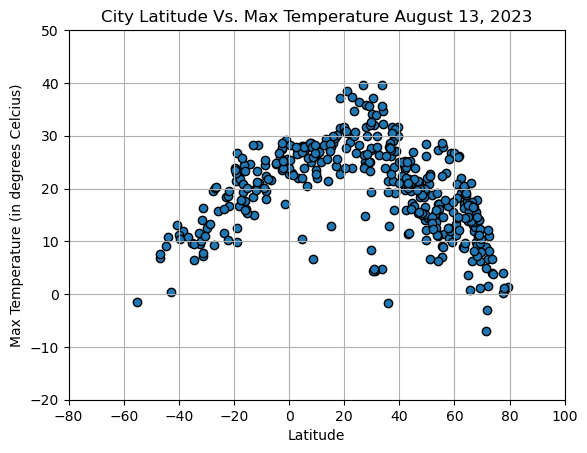

In [11]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y_temp = city_data_df["Max Temp"]

lat_temp = city_data_df[["Lat", "Max Temp"]]
plt.scatter(x,y_temp,edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude") 
plt.ylabel("Max Temperature (in degrees Celcius)")
plt.title("City Latitude Vs. Max Temperature August 13, 2023")
plt.xlim(-80,100)
plt.ylim(-20,50)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

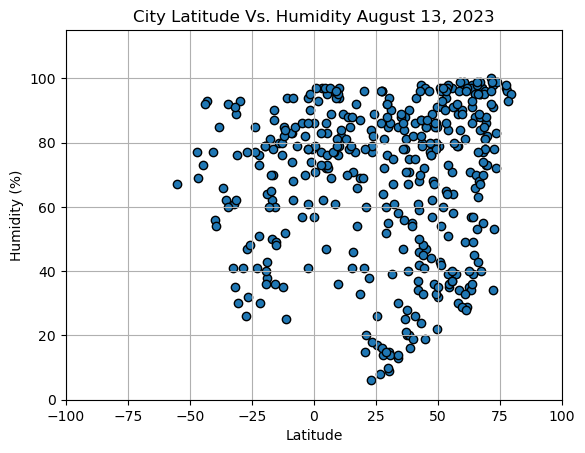

In [12]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y_hum= city_data_df["Humidity"]

lat_temp = city_data_df[["Lat", "Humidity"]]
plt.scatter(x,y_hum,edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude") 
plt.ylabel("Humidity (%)")
plt.title("City Latitude Vs. Humidity August 13, 2023")

plt.xlim(-100,100)
plt.ylim(0,115)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

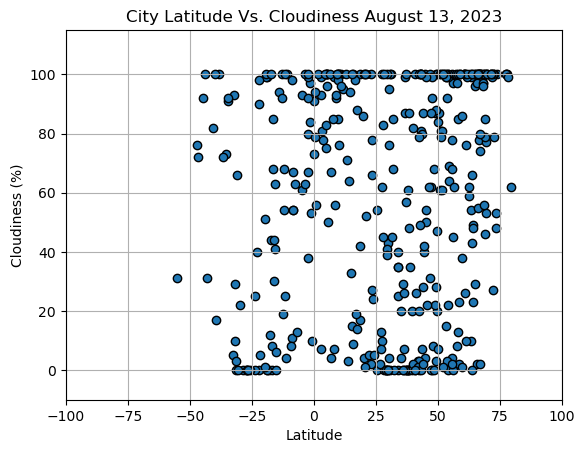

In [13]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y_cloud = city_data_df["Cloudiness"]

lat_temp = city_data_df[["Lat", "Cloudiness"]]
plt.scatter(x,y_cloud,edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude") 
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude Vs. Cloudiness August 13, 2023")

plt.xlim(-100,100)
plt.ylim(-10,115)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

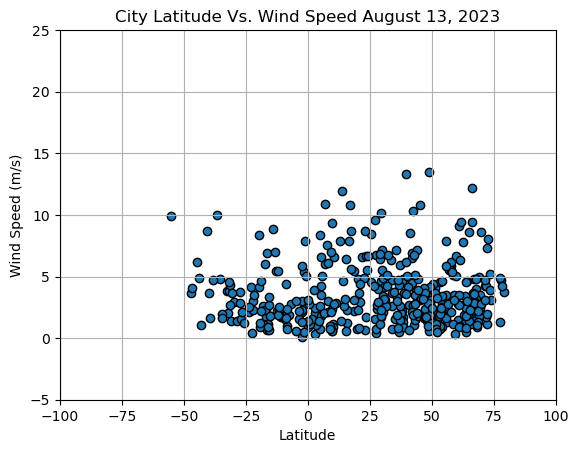

In [14]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y_wind = city_data_df["Wind Speed"]

lat_temp = city_data_df[["Lat", "Wind Speed"]]
plt.scatter(x,y_wind,edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude") 
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude Vs. Wind Speed August 13, 2023")

plt.xlim(-100,100)
plt.ylim(-5,25)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# # Define a function in order to create the linear regression plots
# def lin_reg():
#     lin_reg()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']>=0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kzyltu,53.3991,72.1797,11.94,65,99,4.52,KZ,1691965508
1,karaton,44.9681,53.6072,26.88,19,4,3.74,KZ,1691965510
2,tasnad,47.4409,22.6286,15.30,57,0,2.02,RO,1691965510
3,revda,68.9791,35.8629,14.04,81,85,2.72,RU,1691965511
4,nattam,10.2347,78.2878,26.45,79,100,1.14,IN,1691965511


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']<0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
10,ambato boeny,-16.6069,47.0892,23.40,70,85,0.62,MG,1691965514
15,broome,-16.8204,124.2364,19.39,62,8,1.68,AU,1691965516
18,camabatela,-8.3783,15.1649,19.62,62,54,0.97,AO,1691965518
22,tocopilla,-21.9483,-71.1377,16.70,76,0,3.00,CL,1691965522
29,sao lourenco do sul,-31.1078,-51.9590,7.24,76,66,1.42,BR,1691965528


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6544400026261868


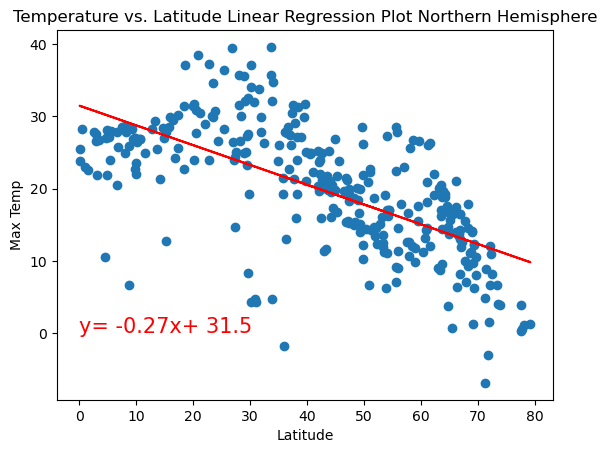

In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']

n_max_temp = northern_hemi_df['Max Temp']
n_humidity = northern_hemi_df['Humidity']
n_cloud = northern_hemi_df['Cloudiness']
n_wind = northern_hemi_df['Wind Speed']

y_values = n_max_temp

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (0, 0), fontsize = 15, color = "red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Temperature vs. Latitude Linear Regression Plot Northern Hemisphere')
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig5.png")

plt.show()

The r-value is: 0.8355564366779623


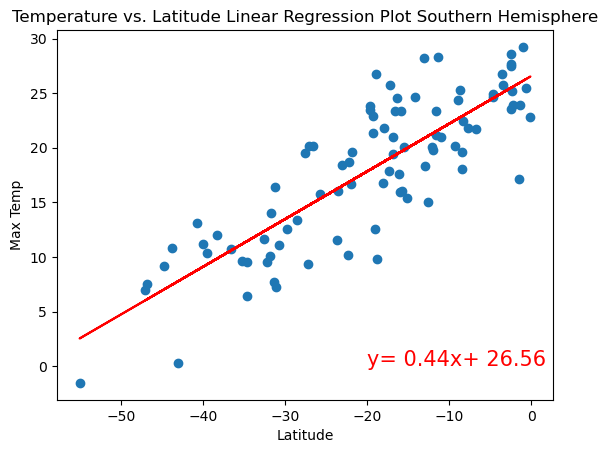

In [27]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']

s_max_temp = southern_hemi_df['Max Temp']
s_humidity = southern_hemi_df['Humidity']
s_cloud = southern_hemi_df['Cloudiness']
s_wind = southern_hemi_df['Wind Speed']

y_values = s_max_temp

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (-20, 0), fontsize = 15, color = "red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Temperature vs. Latitude Linear Regression Plot Southern Hemisphere')
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig6.png")

plt.show()

**Discussion about the linear relationship:** 
    Visaully, the linear regressions between temperature and latitude for both hemishperes look different from each other. In the northern hemisphere, the model shows a negative relationship; as the latitude increases, the temperature decreases. In the southern hemisphere, the model shows a positive relationship; as the latitude increases, the temperature increases. At first, I thought that both models represented opposing patterns, but according to https://www.geographyrealm.com/latitude-longitude/, "A positive latitude value indicates a location in the Northern Hemisphere, while a negative value indicates a location in the Southern Hemisphere." As a result, the more negative the latitude is the closer one is getting to the South Pole and the more positive the latitude the closer one is getting to the North Pole. In other words, as one moves further away from the equator at 0 degrees in either hemisphere, the temperatures get colder. I noticed that near the equator, or at 0 degrees Celsius, both hemispheres have about the same temperature, around 30 degrees Celsius. I predict, algerbraically, to see that the y-intercept for both models are close to each other. The y-intercept represents the temperature at the equator, or when x is zero. The y-intercept for the North and the South Hemipsheres are 31.5 and 26.56, respectively.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.07858867046528979


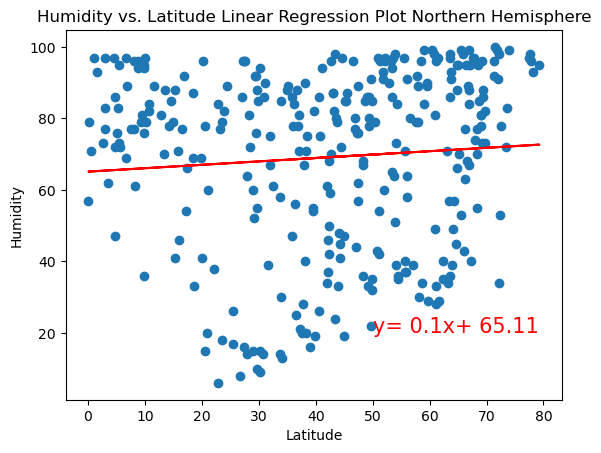

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']

n_max_temp = northern_hemi_df['Max Temp']
n_humidity = northern_hemi_df['Humidity']
n_cloud = northern_hemi_df['Cloudiness']
n_wind = northern_hemi_df['Wind Speed']

y_values = n_humidity

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (50, 20), fontsize = 15, color = "red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude Linear Regression Plot Northern Hemisphere')
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig7.png")

plt.show()

The r-value is: 0.14052991960462996


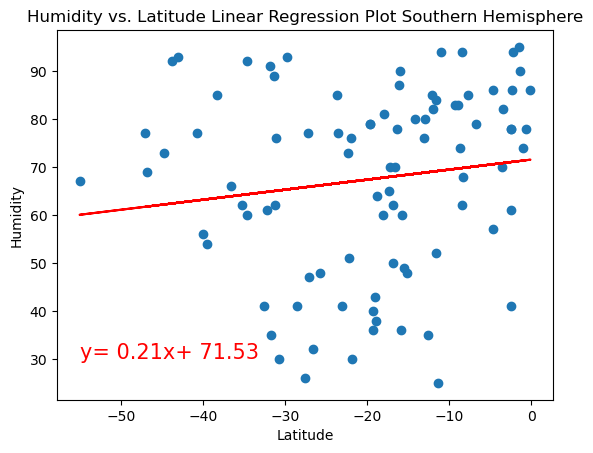

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']

s_max_temp = southern_hemi_df['Max Temp']
s_humidity = southern_hemi_df['Humidity']
s_cloud = southern_hemi_df['Cloudiness']
s_wind = southern_hemi_df['Wind Speed']

y_values = s_humidity

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (-55, 30), fontsize = 15, color = "red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude Linear Regression Plot Southern Hemisphere')
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig8.png")

plt.show()

**Discussion about the linear relationship:** 
    Based on my previous knowledge regarding humidity, I know that humidity is a measurement of how much moisture is held in the air, something that is higher when the air is warmer. Consequently, for the Humidity vs. Latitude models, I predict to see a negative relationship in the northern hemisphere and a positive relationship in the southern hemisphere. However, I instead see positive relationships in both hemispheres between humidity and latitude. Perhaps, my data has been inserted incorrectly or I've misinterpreted the values of the x-axis. Additionally, I find it interesting that a linear model was created for the nothern hemisphere. From looking that the plot, I do notice a slight increase in the slope but most of the data (excluding the outliers) appears to collect near the top of the plot with minimal change in slope. Similarly, I notice that the outliers present in the southern hemisphere plot impacted the regession line by pulling it down, causing a visually obvious decreasing slope. I wonder if those outliers were removed what would the linear regression models look like then. Lastly, I had previously ran this code on another day and with the city_country commented out prior to making the api call. At that time, I had many more data points compared to the current plots.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.10811341478386313


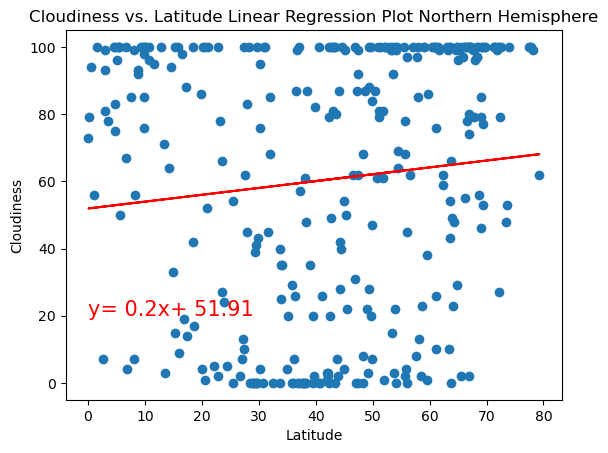

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']

n_max_temp = northern_hemi_df['Max Temp']
n_humidity = northern_hemi_df['Humidity']
n_cloud = northern_hemi_df['Cloudiness']
n_wind = northern_hemi_df['Wind Speed']

y_values = n_cloud

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (0, 20), fontsize = 15, color = "red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude Linear Regression Plot Northern Hemisphere')
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig9.png")

plt.show()

The r-value is: 0.11722603702815036


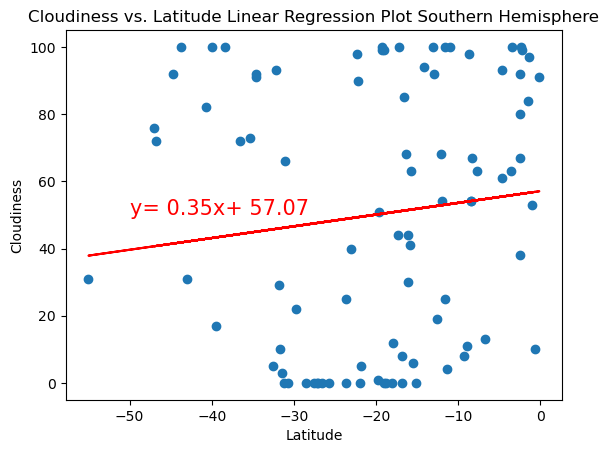

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']

s_max_temp = southern_hemi_df['Max Temp']
s_humidity = southern_hemi_df['Humidity']
s_cloud = southern_hemi_df['Cloudiness']
s_wind = southern_hemi_df['Wind Speed']

y_values = s_cloud

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (-50, 50), fontsize = 15, color = "red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude Linear Regression Plot Southern Hemisphere')
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig10.png")

plt.show()

**Discussion about the linear relationship:** 
    Both linear regression plots on cloudiness show data points that are viusally spread braodly seemingly without a clear relationship. Additionally, both plots have a concentration of data points at 100% humidity that occurs at the absolute value of 40 to 80 degrees latitude. This could mean that for the regions near to the equator the humidity is very high. The linear regression equations were calculated and described below:

Northern Hemisphere:
The linear regression equation is y = 0.02x + 51.91. With a positive slope and a y-intercept of 51.91, one could conclude that a positive relationship exists between the latitude and humidity and that at 0 degrees latitude, the humidity is at about 52%. 

Southern Hemisphere:
The linear regression equation is y = 0.535x + 57.07. With a positive slope and a y-intercept of 57.07, one could conclude that a positive relationship exists between the latitude and humidity and that at 0 degrees latitude, the humidity is at about 57%. 




### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.07669339880516894


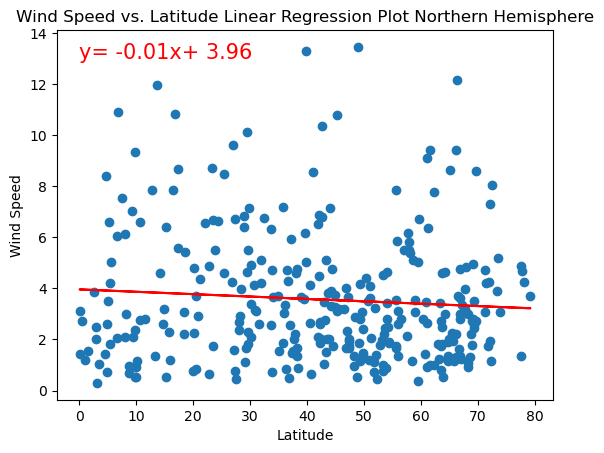

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
n_wind = northern_hemi_df['Wind Speed']

y_values = n_wind

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (0, 13), fontsize = 15, color = "red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude Linear Regression Plot Northern Hemisphere')
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig11.png")

plt.show()

The r-value is: -0.2754438620126054


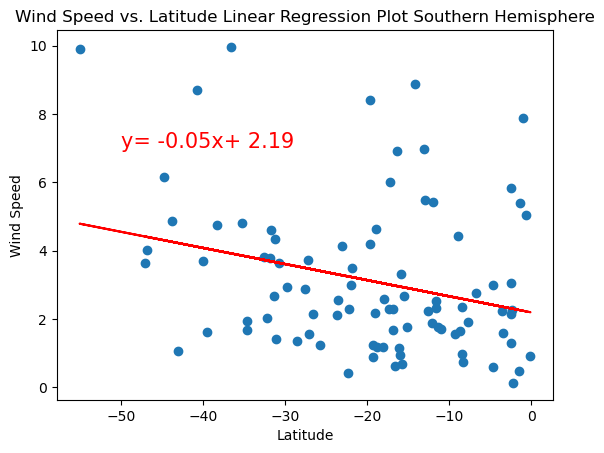

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']

s_wind = southern_hemi_df['Wind Speed']

y_values = s_wind

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (-50, 7), fontsize = 15, color = "red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude Linear Regression Plot Southern Hemisphere')
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig12.png")

plt.show()

**Discussion about the linear relationship:** 
    For the linear regression plots for wind speed vs latitude, the northern hemisphere's model equation is y = -0.01x + 3.96 and for the southern hemisphere the equation is y = -0.05x + 2.19. I noticed that the slopes of both linear regression equations are close to zero. That indicates that the wind speed is mostly consistent across the degrees of latitude. Another noticing was while both hemispheres had few outliers, the northern hemisphere shows more data points clocking higher wind speeds. This, including the higher y-intercept of 3.96, could mean that the northern hemisphere is windier than the southern hemisphere.